In [1]:
import ROOT as rt
import root_numpy as rtnp
import csv
import re
import sys
import uproot
import numpy as np
import awkward
import math
import numba

from matplotlib import pyplot as plt
sys.path.append('/nfshome/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, std_color_list
from array import array
#from prettytable import PrettyTable
import collections
from collections import OrderedDict
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []


Welcome to JupyROOT 6.16/00


In [2]:
directory = '/mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/signal/bbbb/ggh/'
out_dir = '/nfshome/jmao/cms-llp/plots/20190604/'
name_string1 = 'ntuple_RunIISummer16_'
name_string2 = '.root'

labels = {'bbbb_ggh_mh125_mx50_pl10000',
          'bbbb_ggh_mh125_mx50_pl1000',
          'bbbb_ggh_mh2000_mx975_pl1000'}

texs = {}

texs['bbbb_ggh_mh125_mx50_pl10000'] = 'm_{h} = 125 GeV, m_{x} = 50 GeV, c#tau = 10m'
texs['bbbb_ggh_mh125_mx50_pl1000'] = 'm_{h} = 125 GeV, m_{x} = 50 GeV, c#tau = 1m'
texs['bbbb_ggh_mh2000_mx975_pl1000'] = 'm_{h} = 2000 GeV, m_{x} = 975 GeV, c#tau = 1m'

MODEL = 'pp #rightarrow XX, X #rightarrow bb, X #rightarrow bb, ggH'

fpath = OrderedDict()
tree = OrderedDict()
nevts = OrderedDict()
for label in labels:
    print(label)
    fpath[label] = directory + name_string1 + label + name_string2
    print (label, fpath[label])

    print ('File ready')


    root_dir = uproot.open(fpath[label]) 
    print ('Open ready')

    tree[label] = root_dir['ntuples/llp']
    print ('Tree ready')

    nevts[label] = root_dir['ntuples/NEvents'][1]
    print ('NEvents = ', nevts[label])
    print ('NEvents ready')


bbbb_ggh_mh125_mx50_pl10000
bbbb_ggh_mh125_mx50_pl10000 /mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/signal/bbbb/ggh/ntuple_RunIISummer16_bbbb_ggh_mh125_mx50_pl10000.root
File ready
Open ready
Tree ready
NEvents =  50973.0
NEvents ready
bbbb_ggh_mh2000_mx975_pl1000
bbbb_ggh_mh2000_mx975_pl1000 /mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/signal/bbbb/ggh/ntuple_RunIISummer16_bbbb_ggh_mh2000_mx975_pl1000.root
File ready
Open ready
Tree ready
NEvents =  17362.0
NEvents ready
bbbb_ggh_mh125_mx50_pl1000
bbbb_ggh_mh125_mx50_pl1000 /mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/signal/bbbb/ggh/ntuple_RunIISummer16_bbbb_ggh_mh125_mx50_pl1000.root
File ready
Open ready
Tree ready
NEvents =  50918.0
NEvents ready


In [3]:
#sort lists based on list1 and require list1 to be valid
def sort_valid_lists(list1, list2): 
    list3 = []
    for index, (ele1,ele2) in enumerate(zip(list1,list2)): 
#         print(index,ele1,ele2)
        if not math.isnan(ele1):
#             print("ele1 is not nan")
            list3.append(tuple((ele1,ele2)))
    list3.sort(key=lambda x: x[0])
    return list3 

# Match vs No-match Gen Time

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7fe129386ef0>
[-666. -666. -666. -666.] [666 666 666 666] [ 0.96296436  6.5134177   0.8589554   6.2469373   1.8261867   0.7364142
 -0.02888781  0.87065274  1.175428    0.5857776 ]
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7fe1288d50b8>
[-666.        -666.           1.0851071    0.7586729] [666 666   3   1] [1.0851071  0.7586729  2.0579755  1.8796976  0.81756335 1.1572673
 1.3688297  1.4706998  1.5595641  2.0972538 ]
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7fe1288d5dd8>
[-6.6600000e+02  3.1058997e-02  9.5753980e-01 -6.6600000e+02] [666 666 666 666] [ 0.7718095   0.07262754  0.08017302  1.9812499   0.28424552  0.03893956
  0.41376793 -0.20737125  0.51729155  2.6748686 ]


Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_matched.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_matched.pdf has been created


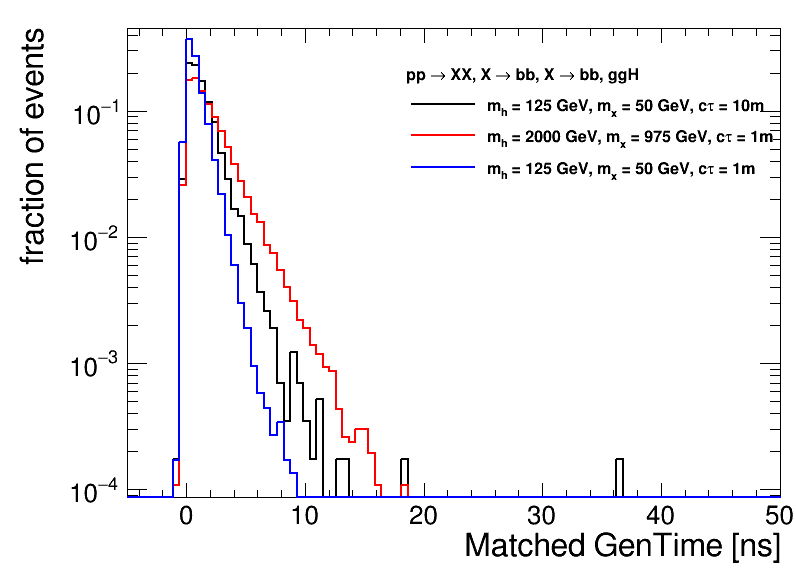

In [4]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

htm ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    jetmatch = v['gLLP_daughter_match_jet_index'].array()
    weight = v['genWeight'].array()
#     t = jetGenTime[:,0]
    vt = jetGenTime[jetmatch!=666]
    print(jetGenTime[0],jetmatch[0],vt[0:10])
    t = vt[:0]
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    htm[k] = create_TH1D( vt, axis_title=[' Matched GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    htm[k].SetLineColor(std_color_list[i])
    htm[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(htm[k],texs[k])

    htm[k].DrawNormalized('same')
    
    i += 1

leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_matched.png')
c.SaveAs(out_dir+'JetGenTime_matched.pdf')

In [5]:
i = 0

htm ={}
for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
#     jetmatch = v['gLLP_daughter_match_jet_index'].array()
    weight = v['genWeight'].array()
    print(np.unique(weight))

    
    i += 1



bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7fe129386ef0>
[1.8231494e-05]
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7fe1288d50b8>
[0.2633416]
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7fe1288d5dd8>
[1.8231494e-05]


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7fe129386ef0>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7fe1288d50b8>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7fe1288d5dd8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_leading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_leading.pdf has been created


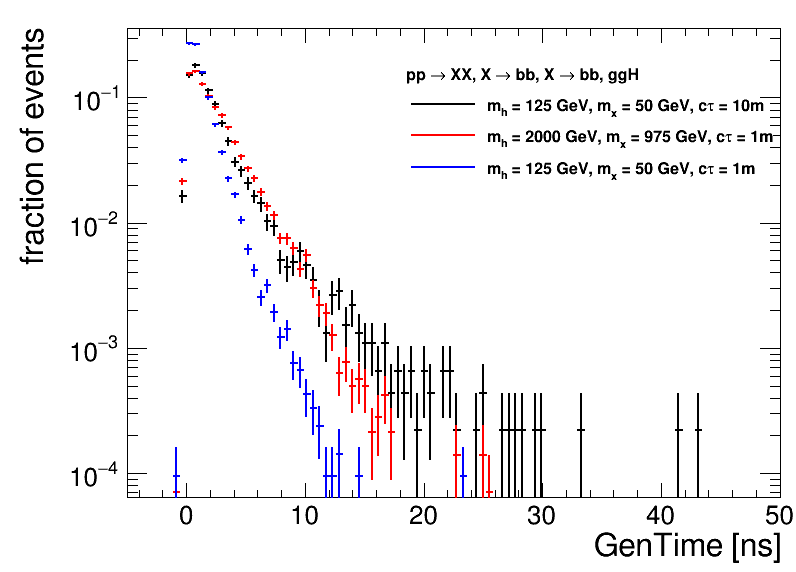

In [6]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

ht0 ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    jetmatch = v['gLLP_daughter_match_jet_index'].array()
    weight = v['genWeight'].array()
    t = jetGenTime[:,0]
#     ht0[k] = create_TH1D( vt, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(ht0[k],texs[k])

    ht0[k].DrawNormalized('same')
    
    i += 1

leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_leading.png')
c.SaveAs(out_dir+'JetGenTime_leading.pdf')

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7fe129386ef0>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7fe1288d50b8>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7fe1288d5dd8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenPT_leading.png has been created


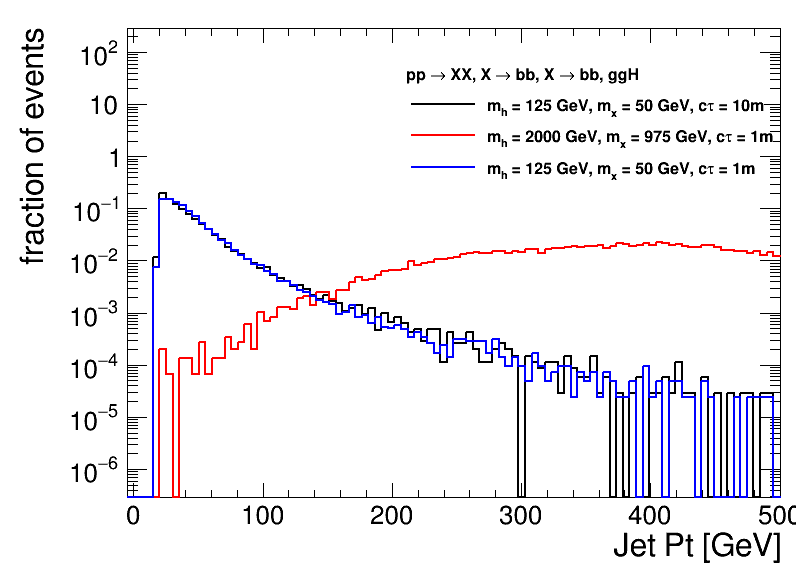

In [19]:
# plot leading jet pt
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

ht0 ={}
for k,v in tree.items():   
    print(k, v)
    nJets = v['nJets'].array()
    jetPt = v['jetPt'].array()
#     jetmatch = v['gLLP_daughter_match_jet_index'].array()
#     weight = v['genWeight'].array()
    Pt = jetPt[nJets>0]
    pt = Pt[:,0]
#     ht0[k] = create_TH1D( vt, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    ht0[k] = create_TH1D( pt, axis_title=['Jet Pt [GeV]', 'fraction of events'], name=k, binning=[100,-5,500])
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])
    ht0[k].GetYaxis().SetRangeUser(1e-2,1e7)


    leg.AddEntry(ht0[k],texs[k])

    ht0[k].DrawNormalized('same')
    
    i += 1

leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenPT_leading.png')


bbbb_ggh_mh125_mx50_pl10000 /mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/signal/bbbb/ggh/ntuple_RunIISummer16_bbbb_ggh_mh125_mx50_pl10000.root 0
bbbb_ggh_mh2000_mx975_pl1000 /mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/signal/bbbb/ggh/ntuple_RunIISummer16_bbbb_ggh_mh2000_mx975_pl1000.root 1
bbbb_ggh_mh125_mx50_pl1000 /mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/signal/bbbb/ggh/ntuple_RunIISummer16_bbbb_ggh_mh125_mx50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604//LLP_pt.png has been created


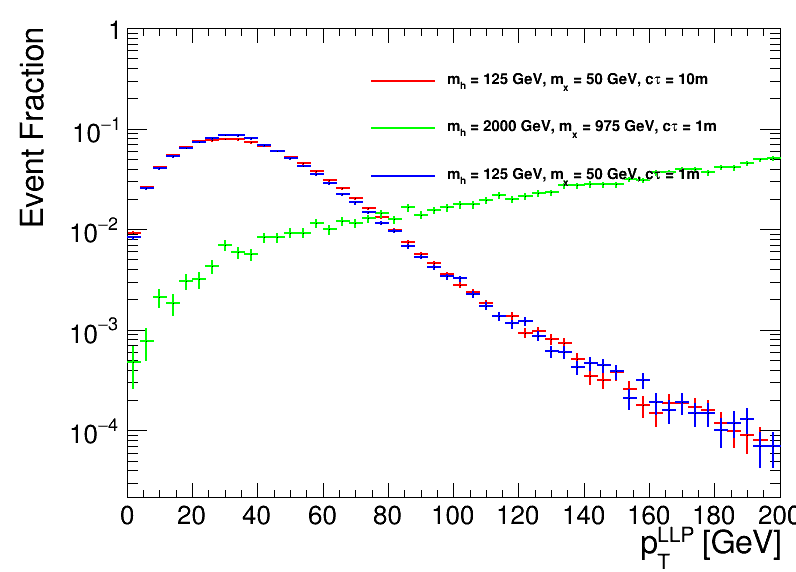

In [33]:
#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
# legall.SetHeader("GlueBall Model",'C')

treenp = {}

cnt = 0
for k,v in fpath.items():
    print(k, v, cnt)
    treenp[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in treenp[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(min(len(b_pt),len(bhat_pt))):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_pt'+str(k)] = create_TH1D(llp_pt, axis_title=['p_{T}^{LLP} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['llp_pt'+str(k)].SetLineColor(cnt+2)
    h['llp_pt'+str(k)].SetStats(0)
    #h['llp_pt'+str(k)].SetMaximum(10*h['llp_pt'+str(k)].GetMaximum())
    h['llp_pt'+str(k)].Scale(1/h['llp_pt'+str(k)].Integral())
    h['llp_pt'+str(k)].SetLineWidth(2)
    h['llp_pt'+str(k)].SetMaximum(1)
    h['llp_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_pt'+str(k)],str(texs[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'/LLP_pt.png')

 
 


In [97]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.75,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

for k,v in tree.items():   

    ht0[k].SetLineStyle(1)
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])

    htm[k].SetLineStyle(7)
    htm[k].SetLineColor(std_color_list[i])
    htm[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(ht0[k],texs[k]+', no match')
    leg.AddEntry(htm[k],texs[k]+', match')
    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i==0:
        ht0[k].DrawNormalized('')
    else:
        ht0[k].DrawNormalized('same')
        htm[k].DrawNormalized('same')
        
    i += 1

leg.SetHeader(str(MODEL))
leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_match_nomatch.png')
c.SaveAs(out_dir+'JetGenTime_match_nomatch.pdf')

KeyError: 'bbbb_ggh_mh125_mx50_pl10000'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [98]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.75,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

for k,v in tree.items():   

    ht0[k].SetLineStyle(1)
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])

    htm[k].SetLineStyle(7)
    htm[k].SetLineColor(std_color_list[i])
    htm[k].SetMarkerColor(std_color_list[i])



    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i==0:
        ht0[k].DrawNormalized('')
        htm[k].DrawNormalized('same')
        leg.AddEntry(ht0[k],texs[k]+', no match')
        leg.AddEntry(htm[k],texs[k]+', match')  
        
    i += 1

leg.SetHeader(str(MODEL))
leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_match_nomatch1.png')
c.SaveAs(out_dir+'JetGenTime_match_nomatch1.pdf')

KeyError: 'bbbb_ggh_mh125_mx50_pl10000'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_match_nomatch2.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_match_nomatch2.pdf has been created


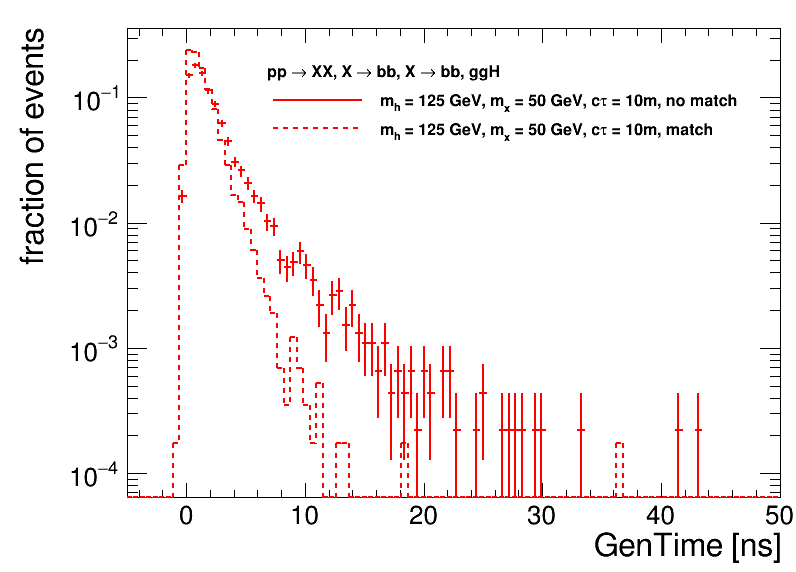

In [104]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.75,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

for k,v in tree.items():   

    ht0[k].SetLineStyle(1)
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])

    htm[k].SetLineStyle(7)
    htm[k].SetLineColor(std_color_list[i])
    htm[k].SetMarkerColor(std_color_list[i])



    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i==1:
        ht0[k].DrawNormalized('')
        htm[k].DrawNormalized('same')
        leg.AddEntry(ht0[k],texs[k]+', no match')
        leg.AddEntry(htm[k],texs[k]+', match')  
        
    i += 1

leg.SetHeader(str(MODEL))
leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_match_nomatch2.png')
c.SaveAs(out_dir+'JetGenTime_match_nomatch2.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_match_nomatch3.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_match_nomatch3.pdf has been created


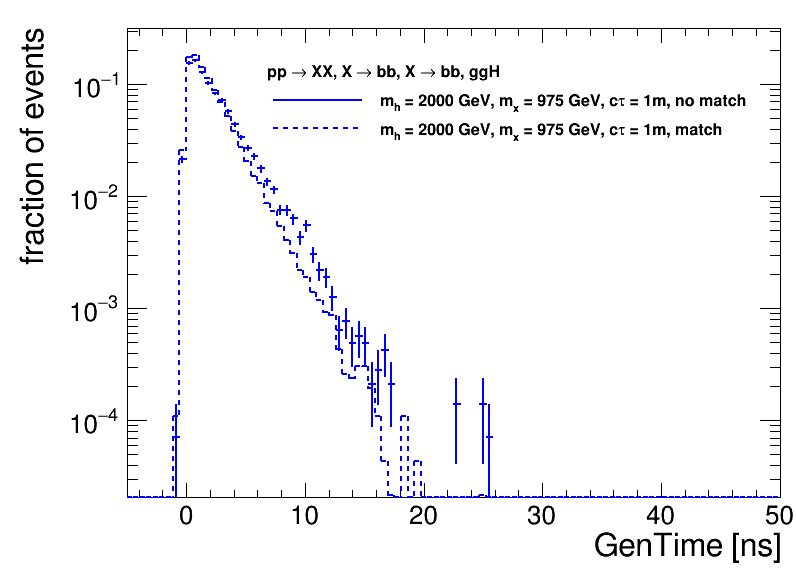

In [105]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.75,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

for k,v in tree.items():   

    ht0[k].SetLineStyle(1)
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])

    htm[k].SetLineStyle(7)
    htm[k].SetLineColor(std_color_list[i])
    htm[k].SetMarkerColor(std_color_list[i])



    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i==2:
        ht0[k].DrawNormalized('')
        htm[k].DrawNormalized('same')
        leg.AddEntry(ht0[k],texs[k]+', no match')
        leg.AddEntry(htm[k],texs[k]+', match')  
        
    i += 1

leg.SetHeader(str(MODEL))
leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_match_nomatch3.png')
c.SaveAs(out_dir+'JetGenTime_match_nomatch3.pdf')

# Leading, subleading, all and w/ w/o beam spot gen time

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_leading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_leading.pdf has been created


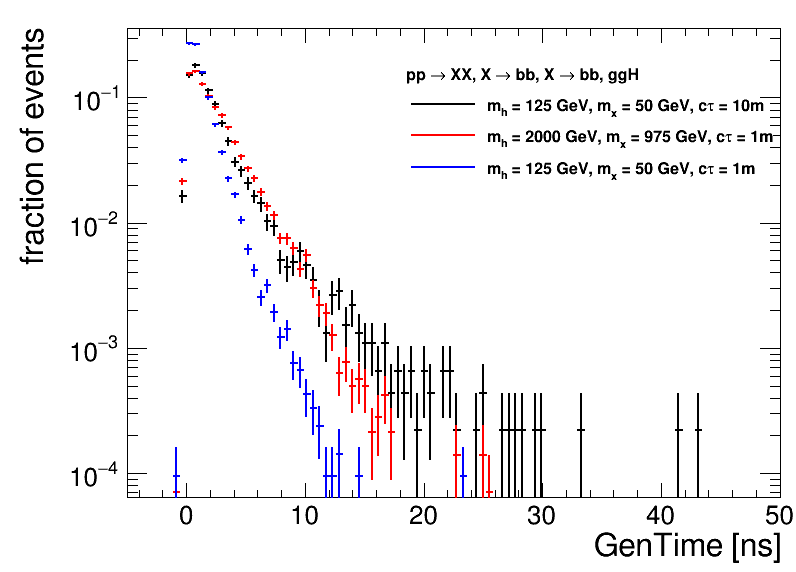

In [99]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

ht0 ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    t = jetGenTime[:,0]
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(ht0[k],texs[k])

    ht0[k].DrawNormalized('same')
    
    i += 1

leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_leading.png')
c.SaveAs(out_dir+'JetGenTime_leading.pdf')

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl10000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh2000_mx975_pl1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl1000 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_leading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_leading.pdf has been created


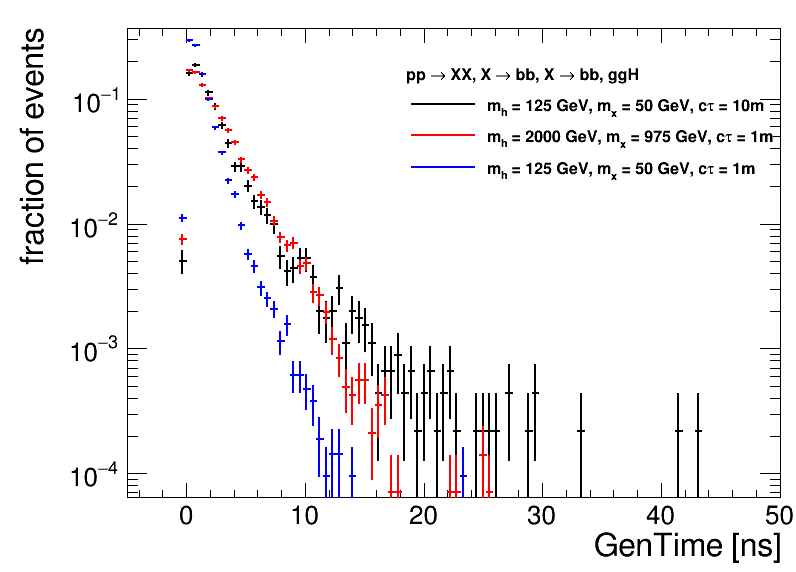

In [100]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

htt0 ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    t = jetGenTime[:,0] - BSTime
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    htt0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    htt0[k].SetLineColor(std_color_list[i])
    htt0[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(htt0[k],texs[k])

    htt0[k].DrawNormalized('same')
    
    i += 1

leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_leading.pdf')

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl10000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh2000_mx975_pl1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl1000 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_PlusSmear_leading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_PlusSmear_leading.pdf has been created


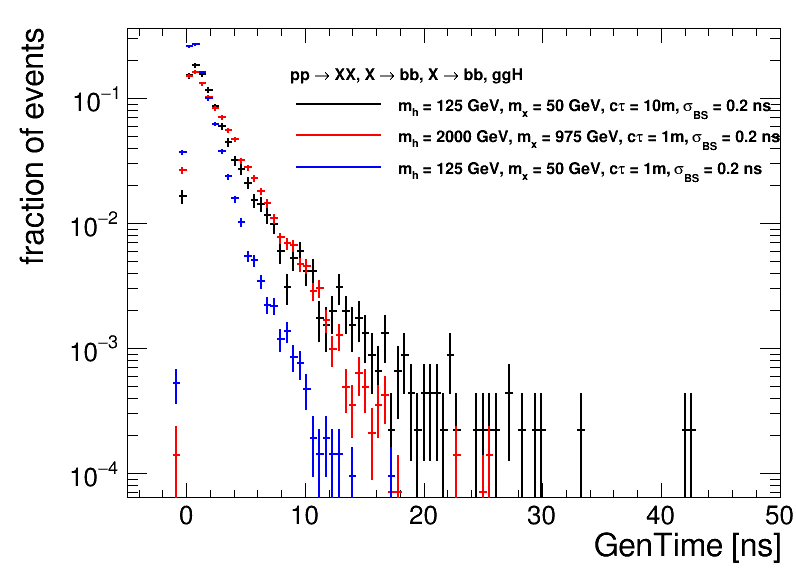

In [101]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.35,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hs ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    SmearTime = np.random.normal(0,0.2,len(BSTime))
    t = jetGenTime[:,0] - BSTime + SmearTime
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    hs[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    hs[k].SetLineColor(std_color_list[i])
    hs[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(hs[k],texs[k]+', #sigma_{BS} = 0.2 ns')

    hs[k].DrawNormalized('same')
    
    i += 1

leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmear_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmear_leading.pdf')

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl10000 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_PlusSmearS_leading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_PlusSmearS_leading.pdf has been created


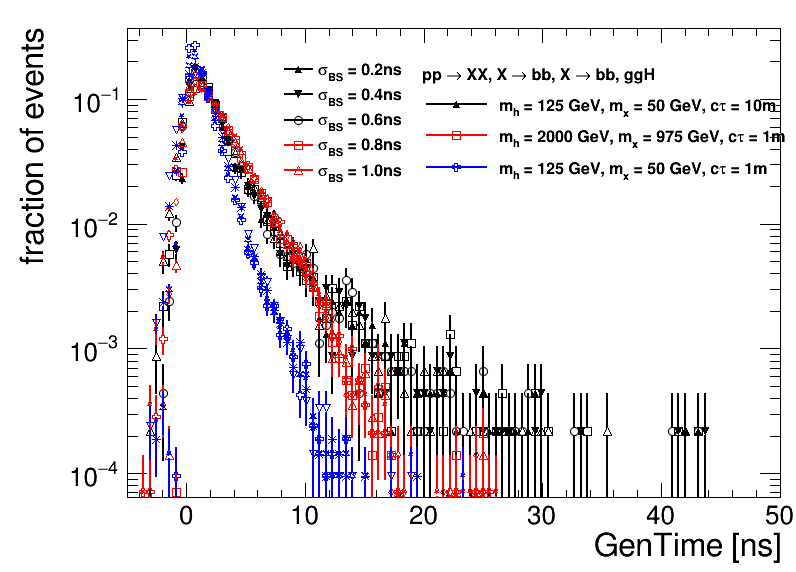

In [102]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.35,0.68,0.55,0.90);
leg1 = rt.TLegend(0.52,0.68,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hts = {}
SmearTime = {}
# print(len(tree))
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(tree)+j
        SmearTime[n] = np.random.normal(0,sig,len(BSTime))
        t = jetGenTime[:,0] - BSTime + SmearTime[n]
        hts[n] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k+str(j), binning=[100,-5,50], weights = weight)
        hts[n].SetLineColor(std_color_list[i])
        hts[n].SetMarkerColor(std_color_list[i])
        hts[n].SetMarkerStyle(22+n)

        if i==0:
            leg.AddEntry(hts[n],'#sigma_{BS} = '+str(sig)+'ns')
#             leg.AddEntry(hs[n],k)
        if j ==0:
            leg1.AddEntry(hts[n],texs[k])
#         leg.AddEntry(hs[n],k+' #sigma_{BS} = '+str(sig)+'ns')
        hts[n].DrawNormalized('LPsame')
    
    i += 1

leg.SetBorderSize(0)
leg1.SetHeader(str(MODEL))
leg1.SetBorderSize(0)

leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_leading.pdf')

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl10000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh2000_mx975_pl1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl1000 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_subleading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_subleading.pdf has been created


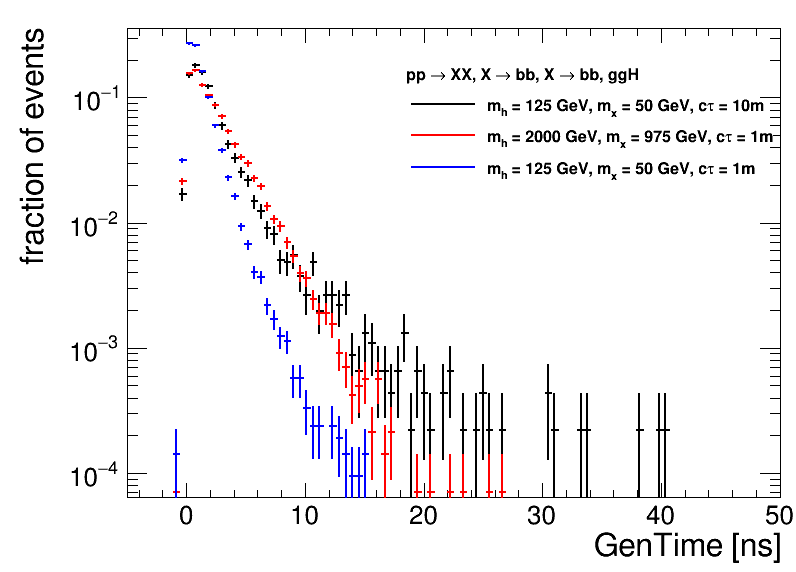

In [103]:
# plot subleading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

ht1 ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    t = jetGenTime[:,1]
#     ht1[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    ht1[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    ht1[k].SetLineColor(std_color_list[i])
    ht1[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(ht1[k],texs[k])

    ht1[k].DrawNormalized('same')
    
    i += 1

leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_subleading.png')
c.SaveAs(out_dir+'JetGenTime_subleading.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_leading_w_wo_BS.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_leading_w_wo_BS.pdf has been created


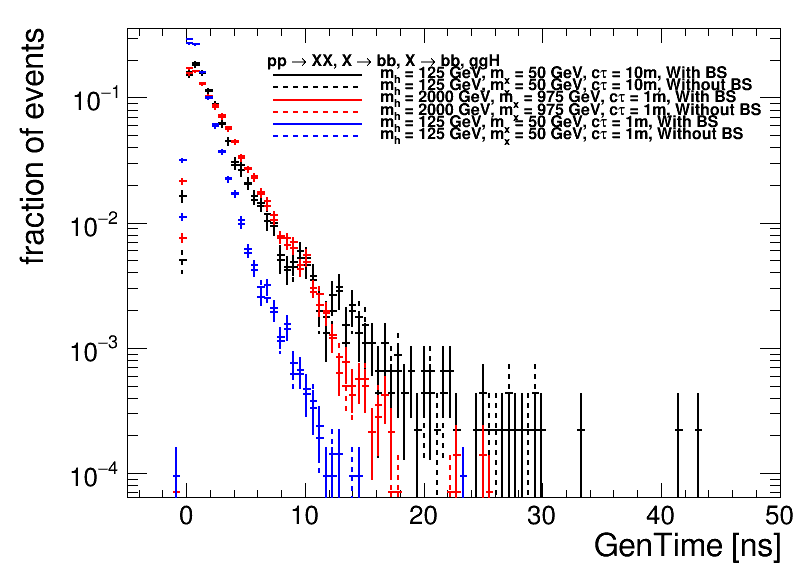

In [104]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.75,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

for k,v in tree.items():   

    ht0[k].SetLineStyle(1)
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])

    htt0[k].SetLineStyle(7)
    htt0[k].SetLineColor(std_color_list[i])
    htt0[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(ht0[k],texs[k]+', With BS')
    leg.AddEntry(htt0[k],texs[k]+', Without BS')
    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if k==0:
        ht0[k].DrawNormalized('')
    else:
        ht0[k].DrawNormalized('same')
        htt0[k].DrawNormalized('same')
        
    i += 1

leg.SetHeader(str(MODEL))
leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_leading_w_wo_BS.png')
c.SaveAs(out_dir+'JetGenTime_leading_w_wo_BS.pdf')

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl10000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh2000_mx975_pl1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl1000 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_all.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_all.pdf has been created


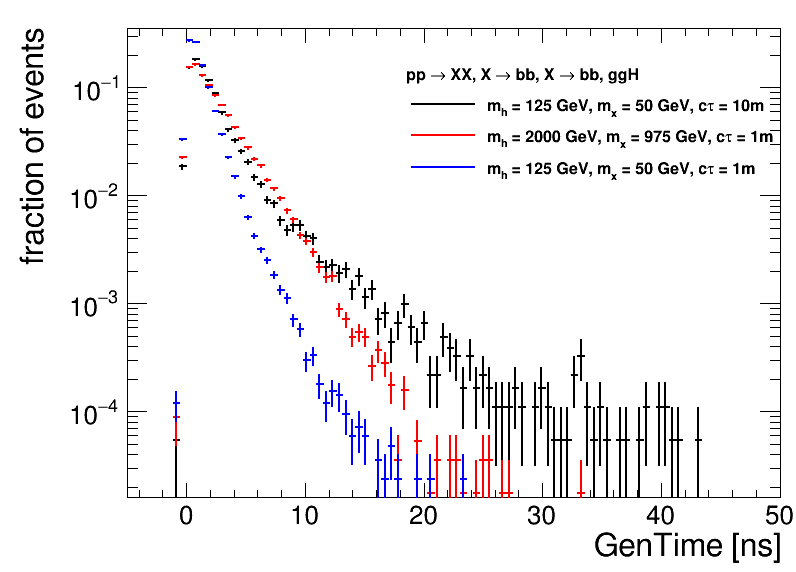

In [105]:
# plot all jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

ht ={}
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    sizes = [len(x) for x in jetGenTime]
    t = jetGenTime.flatten()
    flat_weight = []
    for j, (n, val) in enumerate(zip(sizes, weight)):
        #print n
        #print val
        #print n*[val]
        flat_weight += n*[val]
        #print flat_weight[k]
    flat_weight = np.array(flat_weight)
    # weight = tree['weight'].array()
#     ht[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    ht[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = flat_weight)
    ht[k].SetLineColor(std_color_list[i])
    ht[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(ht[k],texs[k])

    ht[k].DrawNormalized('same')
    
    i += 1

leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_all.png')
c.SaveAs(out_dir+'JetGenTime_all.pdf')

# Most delayed jet timing cut

In [106]:
# plot jet time rejection power inclusively

#time cuts
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)

maxes = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    
    jetGenTime_max = []
    for evt, w in enumerate(weight):
#         print(evt,w)
#         print(jetGenTime[evt])
#         print(evt,np.amax(jetGenTime[evt]))
#         print(len(jetGenTime[evt]))
        if(len(jetGenTime[evt])>0):
            max_t =  np.amax(jetGenTime[evt])
            jetGenTime_max.append(max_t)
        else:
            jetGenTime_max.append(-666)
            
#         if evt>10:
#             break
    jetGenTime_max = np.array(jetGenTime_max)
    maxes.append(jetGenTime_max)
    print('found max jet gen time')
maxes = np.array(maxes)

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
found max jet gen time
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
found max jet gen time
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
found max jet gen time


In [107]:
print('lol')

lol


In [14]:
i = 0
Power_rej = []
Power_eff = []
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    
#     Ntotal_w = np.sum(weight)
#     print('tatal',Ntotal_w)

    Power_rej_i = []
    Power_eff_i = []

    jetGenTime_max = maxes[i] 

    for p, q in enumerate(t_cuts):
#         print(p,q)
        tcut_string = np.logical_and( jetGenTime_max > q, jetGenTime_max!=-666)
        tcut666_string = np.logical_and( jetGenTime_max, jetGenTime_max!=-666)
#         tcutted_t_v = jetGenTime_max[tcut_string]
        weight_cut666 = weight[tcut666_string]
        Ntotal_w = np.sum(weight_cut666)
#         print('tatal',Ntotal_w)

        tcutted_w_v = weight[tcut_string]
    #     Ntotal_w = tcutted_w_v.shape[0]
        Nsel_w = np.sum(tcutted_w_v)
#         print(Nsel_w)
        Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
        Prej_i = 1.0*Ntotal_w/Nsel_w
        Power_rej_i.append(Prej_i)
        Peff_i = 1.0*Nsel_w/Ntotal_w
        Power_eff_i.append(Peff_i)
        
    Power_rej_i = np.array(Power_rej_i) 
#     print('Rejection power',Power_rej_i)
    Power_rej.append(Power_rej_i)
    
    Power_eff_i = np.array(Power_eff_i) 
    print('Signal Efficiency',Power_eff_i)
    Power_eff.append(Power_eff_i)
    
    i += 1
    
Power_rej = np.array(Power_rej)        
Power_eff = np.array(Power_eff)


bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9949b0fba8>
Signal Efficiency [1.         1.         1.         1.         1.         1.
 0.99991397 0.99919658 0.99440447 0.97649866 0.92923753 0.85333874
 0.76696609 0.6831473  0.60162417 0.29929124 0.14617352 0.07518151
 0.04071854]
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9949b0fb38>
Signal Efficiency [1.         1.         1.         1.         1.         1.
 0.99990153 0.99911413 0.99616144 0.97972441 0.94015747 0.88562993
 0.81958662 0.7523623  0.6948819  0.43799219 0.27667326 0.18897638
 0.13415356]
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9948cacf28>
Signal Efficiency [1.         1.         1.         1.         1.         1.
 1.         0.99982606 0.9992462  0.99570964 0.98736081 0.97077924
 0.94718227 0.921672   0.89001624 0.71196656 0.53490256 0.38143552
 0.27116188]


In [108]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)

for k,v in tree.items():   
    print(k, v)

    Power_rej_i = Power_rej[i] 
    
    power = np.array(Power_rej_i) 
    #print num, t_cuts, power
    hrej[k] = rt.TGraph(num , t_cuts, power)

    hrej[k].SetLineColor(std_color_list[i])
    hrej[k].SetMarkerColor(std_color_list[i])
    hrej[k].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(hrej[k],texs[k])

    hrej[k].SetTitle( 'Rejection Power' )
    hrej[k].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej[k].GetYaxis().SetRangeUser(0.8,100)
    hrej[k].GetYaxis().SetTitle( 'Rejection Power' )
    if i==0 :
        hrej[k].Draw('ALPsame')
    else:
        hrej[k].Draw('LPsame')
    
    i += 1


leg.SetHeader(str(MODEL))
leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_GenTimeMax_Time.png')
c.SaveAs(out_dir+'RejectionPower_GenTimeMax_Time.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>


NameError: name 'Power_rej' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [109]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

heff = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)

for k,v in tree.items():   
    print(k, v)

    Power_eff_i = Power_eff[i] 
    
    power = np.array(Power_eff_i) 
    #print num, t_cuts, power
    heff[k] = rt.TGraph(num , t_cuts, power)

    heff[k].SetLineColor(std_color_list[i])
    heff[k].SetMarkerColor(std_color_list[i])
    heff[k].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(heff[k],texs[k])

    heff[k].SetTitle( 'Signal Efficiency' )
    heff[k].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    heff[k].GetYaxis().SetRangeUser(1e-2,1e1)
    heff[k].GetYaxis().SetTitle( 'Signal Efficiency' )
    if i==0 :
        heff[k].Draw('ALPsame')
    else:
        heff[k].Draw('LPsame')
    
    i += 1


leg.SetHeader(str(MODEL))
leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTimeMax_Time.png')
c.SaveAs(out_dir+'SignalEff_GenTimeMax_Time.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>


NameError: name 'Power_eff' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


# Most and second delayed jet timing cut

In [7]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)

firsts = []
seconds = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    jetTime_most_delayed = []
    jetTime_second_delayed = []

    for i, (time, pt) in enumerate(zip(jetGenTime,jetPt)):
#         print(i,time,pt,len(time),len(pt))
        time_s =[]
        pt_s= []
        for j in range(len(time)):
#             print(j,pt[j])
            time_s.append(time[j])
            pt_s.append(pt[j])
#         print(i,time_s)
#         print(i,pt_s)
        validpairlist = sort_valid_lists(time_s,pt_s)
#         print(i,validpairlist)
#         print(validpairlist[-1][0])
        if len(validpairlist)>1 :
#             print(i,len(validpairlist))
#             print(i,validpairlist[-1][0],validpairlist[-2][0])
            jetTime_most_delayed.append(validpairlist[-1][0])
            jetTime_second_delayed.append(validpairlist[-2][0])
        else:
            jetTime_most_delayed.append(-666)
            jetTime_second_delayed.append(-666)
#         if i>2:
#             break
    jetTime_most_delayed = np.array(jetTime_most_delayed)
    jetTime_second_delayed = np.array(jetTime_second_delayed)
    
    firsts.append(jetTime_most_delayed)
    seconds.append(jetTime_second_delayed)
    print('found max jet gen time')

firsts = np.array(firsts)
seconds = np.array(seconds)
print('found max jet gen time')



bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
found max jet gen time
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
found max jet gen time
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
found max jet gen time
found max jet gen time


In [112]:
i = 0
Power_rej_2j = []
Power_eff_2j = []
for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    
#     Ntotal_w = np.sum(weight)
#     print('tatal',Ntotal_w)

    Power_rej_2j_i = []
    Power_eff_2j_i = []

    jetGenTime_max = firsts[i] 
    jetGenTime_second = seconds[i] 

    for p, q in enumerate(t_cuts):
#         print(p,q)
#         tcut_string = np.logical_and( jetGenTime_max > q, jetGenTime_max!=-666)
#         tcutted_t_v = jetGenTime_max[tcut_string]
        tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max!=-666)
#         tcutted_t1_v = jetGenTime_max[tcut_string1]
        tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second!=-666)
#         tcutted_t2_v = jetGenTime_second[tcut_string2]
        tcut_string = np.logical_and( tcut_string1, tcut_string2)
#         print(tcut_string)
#         tcut666_string = np.logical_and( jetGenTime_max, jetGenTime_max!=-666)
        tcut666_string = np.logical_and( jetGenTime_second!=-666, jetGenTime_max!=-666)
        weight_cut666 = weight[tcut666_string]
        Ntotal_w = np.sum(weight_cut666)
#         print('tatal',Ntotal_w)

        tcutted_w_v = weight[tcut_string]
        tcutted_w1_v = weight[tcut_string1]
        tcutted_w2_v = weight[tcut_string2]
#         Nsel_w = np.sum(tcutted_w_v)
        Nsel_w = np.sum(tcutted_w_v)
#         print(Nsel_w)
        Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
        Prej_2j_i = 1.0*Ntotal_w/Nsel_w
        Power_rej_2j_i.append(Prej_2j_i)
        Peff_2j_i = 1.0*Nsel_w/Ntotal_w
        Power_eff_2j_i.append(Peff_2j_i)
        
    Power_rej_2j_i = np.array(Power_rej_2j_i) 
# #     print('Rejection power',Power_rej_i)
    Power_rej_2j.append(Power_rej_2j_i)
    
    Power_eff_2j_i = np.array(Power_eff_2j_i) 
    print('Signal Efficiency',Power_eff_2j_i)
    Power_eff_2j.append(Power_eff_2j_i)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_eff_2j = np.array(Power_eff_2j)
print(Power_eff_2j)


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
Signal Efficiency [1.         1.         1.         1.         1.         1.
 1.         0.99872393 0.99276827 0.96710163 0.91732854 0.84897908
 0.77736824 0.70575728 0.6399603  0.37975045 0.23425981 0.16009643
 0.11259219]
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
Signal Efficiency [1.         1.         1.         1.         1.         1.
 0.99993955 0.99939514 0.99643117 0.98270017 0.9517299  0.90581901
 0.85652072 0.80359303 0.75042342 0.52201793 0.34702396 0.22749819
 0.14777402]
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
Signal Efficiency [1.         1.         1.         1.         1.         1.
 0.99984775 0.99855361 0.99063677 0.95771321 0.88044759 0.76953526
 0.66025957 0.5597762  0.47162488 0.19289767 0.07844555 0.03600655
 0.01773684]
[[1.         1.         1.         1.         1.         1.
  1.         0.99872393 0.99276827 0.96710163 0.91732854 0.84897908
  0.77736824 0.70

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTimeSecond_Time.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTimeSecond_Time.pdf has been created


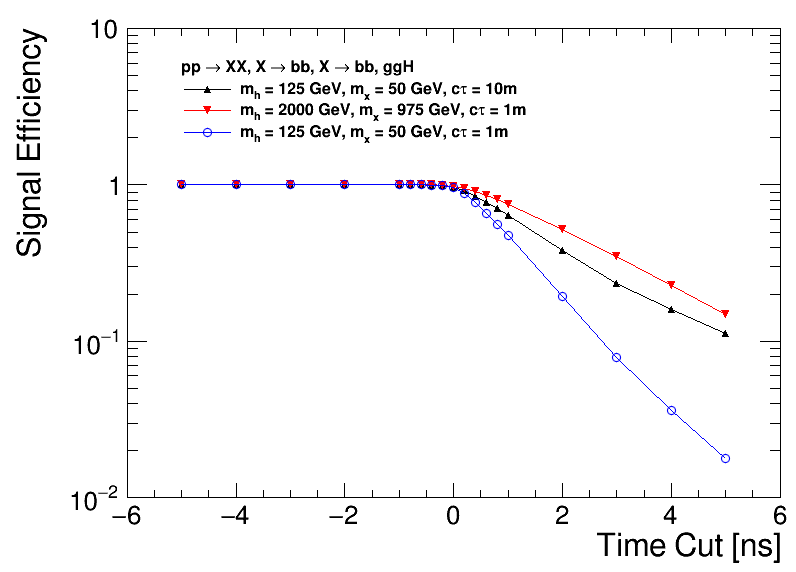

In [113]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

heff2 = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)

# for k,v in tree.items():   
#     print(k, v)

#     Power_eff_i = Power_eff[i] 
    
#     power = np.array(Power_eff_i) 
#     #print num, t_cuts, power
#     heff[k] = rt.TGraph(num , t_cuts, power)

#     heff[k].SetLineColor(std_color_list[i])
#     heff[k].SetMarkerColor(std_color_list[i])
#     heff[k].SetMarkerStyle(22+i)
#     #     hrej[m].SetMarkerSize(2)


#     leg.SetBorderSize(0)
#     leg.AddEntry(heff[k],k)

#     heff[k].SetTitle( 'Signal Efficiency' )
#     heff[k].GetXaxis().SetTitle( 'Time Cut [ns]' )
#     #hrej[m].GetXaxis().SetRangeUser(-10,10)
#     heff[k].GetYaxis().SetRangeUser(1e-2,1e1)
#     heff[k].GetYaxis().SetTitle( 'Signal Efficiency' )
#     if i==0 :
#         heff[k].Draw('ALPsame')
#     else:
#         heff[k].Draw('LPsame')
    
#     i += 1

for k,v in tree.items():   
    print(k, v)

    Power_eff_i = Power_eff_2j[i] 
    
    power = np.array(Power_eff_i) 
    #print num, t_cuts, power
    heff2[k] = rt.TGraph(num , t_cuts, power)

    heff2[k].SetLineColor(std_color_list[i])
    heff2[k].SetMarkerColor(std_color_list[i])
    heff2[k].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(heff2[k],texs[k])

    heff2[k].SetTitle( 'Signal Efficiency' )
    heff2[k].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    heff2[k].GetYaxis().SetRangeUser(1e-2,1e1)
    heff2[k].GetYaxis().SetTitle( 'Signal Efficiency' )
    if i==0 :
        heff2[k].Draw('ALPsame')
    else:
        heff2[k].Draw('LPsame')
    
    i += 1


leg.SetHeader(str(MODEL))
leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTimeSecond_Time.png')
c.SaveAs(out_dir+'SignalEff_GenTimeSecond_Time.pdf')


In [114]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.75,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

h1 = {}
h2 = {}

for k,v in tree.items():   
    print(k, v)

    Power_eff_i = Power_eff[i] 
    
    power1 = np.array(Power_eff_i) 
    #print num, t_cuts, power
    h1[k] = rt.TGraph(num , t_cuts, power1)
    
    Power_eff_2j_i = Power_eff_2j[i] 
    
    power2 = np.array(Power_eff_2j_i) 
    h2[k] = rt.TGraph(num , t_cuts, power2)

    h1[k].SetLineColor(std_color_list[i])
    h1[k].SetMarkerColor(std_color_list[i])
    h1[k].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)
    
    h2[k].SetLineStyle(7)
    h2[k].SetLineColor(std_color_list[i])
    h2[k].SetMarkerColor(std_color_list[i])
    h2[k].SetMarkerStyle(22+i)


    leg.SetBorderSize(0)
    leg.AddEntry(h1[k],texs[k]+', One jet')
    leg.AddEntry(h2[k],texs[k]+', Two jets')

    h1[k].SetTitle( 'Signal Efficiency' )
    h1[k].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    h1[k].GetYaxis().SetRangeUser(1e-2,1e1)
    h1[k].GetYaxis().SetTitle( 'Signal Efficiency' )
    if i==0 :
        h1[k].Draw('ALPsame')
    else:
        h1[k].Draw('LPsame')
        h2[k].Draw('LPsame')
    
    i += 1


leg.SetHeader(str(MODEL))
leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>


NameError: name 'Power_eff' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


# Different beam spot semaring scenarios

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl10000 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_PlusSmearS_leading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_PlusSmearS_leading.pdf has been created


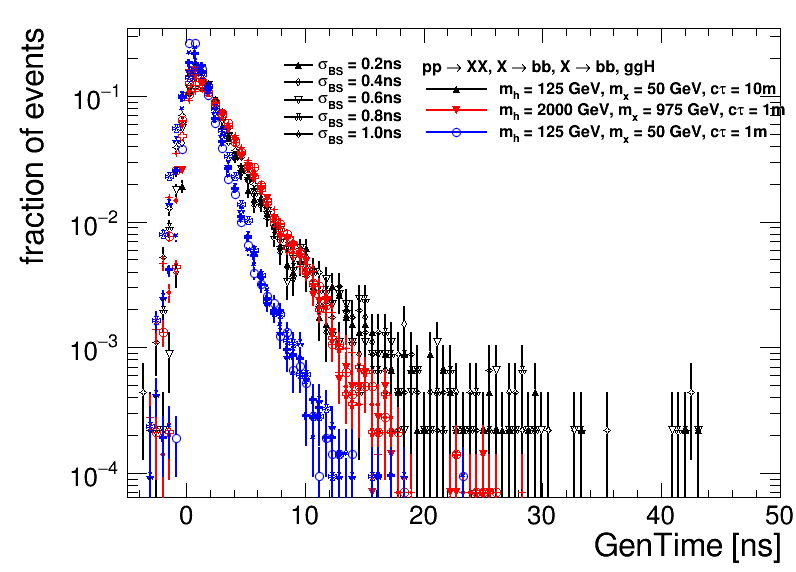

In [115]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hts = {}
SmearTime = {}
# print(len(tree))
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i+j*len(sigma)
#         print(i,j,n)
        SmearTime[n] = np.random.normal(0,sig,len(BSTime))
        t = jetGenTime[:,0] - BSTime + SmearTime[n]
        hts[n] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k+str(j), binning=[100,-5,50], weights = weight)
        hts[n].SetLineColor(std_color_list[i])
        hts[n].SetMarkerColor(std_color_list[i])
        hts[n].SetMarkerStyle(22+n)

        if i==0:
            leg.AddEntry(hts[n],'#sigma_{BS} = '+str(sig)+'ns')
#             leg.AddEntry(hs[n],k)
        if j ==0:
            leg1.AddEntry(hts[n],texs[k])
#         leg.AddEntry(hs[n],k+' #sigma_{BS} = '+str(sig)+'ns')
        hts[n].DrawNormalized('LPsame')
    
    i += 1

leg.SetBorderSize(0)
leg1.SetHeader(str(MODEL))
leg1.SetBorderSize(0)

leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_leading.pdf')

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl100000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl100001 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl100002 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl100003 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl100004 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh2000_mx975_pl10000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh2000_mx975_pl10001 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh2000_mx975_pl10002 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh2000_mx975_pl1000

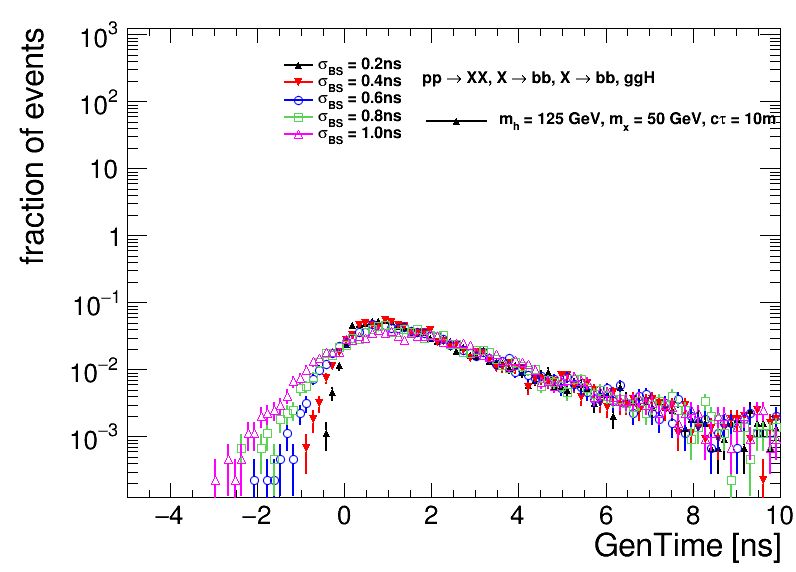

In [116]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hts1 = {}
SmearTime = {}
# print(len(tree))
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
        SmearTime[n] = np.random.normal(0,sig,len(BSTime))
        t = jetGenTime[:,0] - BSTime + SmearTime[n]
        hts1[n] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k+str(j), binning=[100,-5,10], weights = weight)
        hts1[n].SetLineColor(std_color_list[j])
        hts1[n].GetYaxis().SetRangeUser(1e-5,1e2)
        hts1[n].SetMarkerColor(std_color_list[j])
        hts1[n].SetMarkerStyle(22+n)

        if i==0:
            leg.AddEntry(hts1[n],'#sigma_{BS} = '+str(sig)+'ns')
#             leg.AddEntry(hs[n],k)
#         if j ==0:
        if i ==0 and j==0:
            leg1.AddEntry(hts1[n],texs[k])
#         leg.AddEntry(hs[n],k+' #sigma_{BS} = '+str(sig)+'ns')
        if i==0:
            hts1[n].DrawNormalized('LPsame')
    
    i += 1

leg.SetBorderSize(0)
leg1.SetHeader(str(MODEL))
leg1.SetBorderSize(0)

leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_1_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_1_leading.pdf')

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_PlusSmearS_2_leading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_PlusSmearS_2_leading.pdf has been created


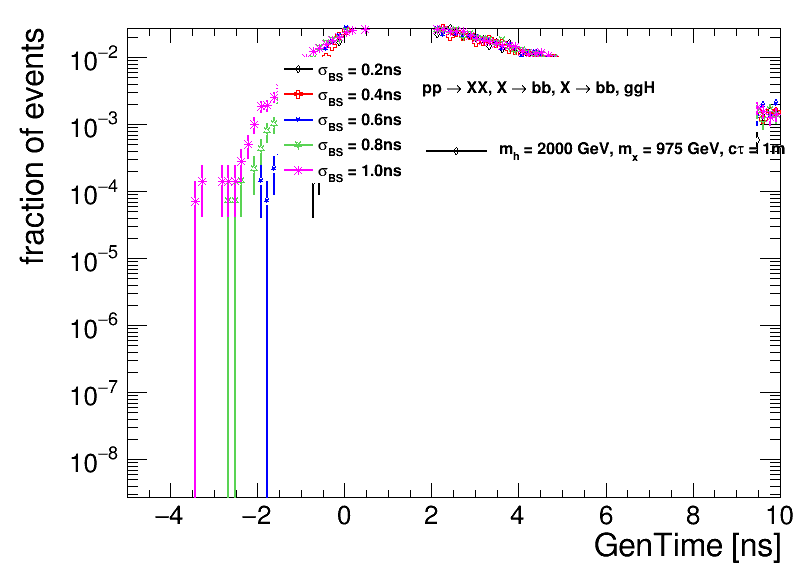

In [117]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.35,0.68,0.55,0.90);
leg1 = rt.TLegend(0.52,0.68,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hts1 = {}
SmearTime = {}
# print(len(tree))
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
        SmearTime[n] = np.random.normal(0,sig,len(BSTime))
        t = jetGenTime[:,0] - BSTime + SmearTime[n]
        hts1[n] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k+str(j), binning=[100,-5,10], weights = weight)
        hts1[n].SetLineColor(std_color_list[j])
        hts1[n].GetYaxis().SetRangeUser(1e-5,1e2)
        hts1[n].SetMarkerColor(std_color_list[j])
        hts1[n].SetMarkerStyle(22+n)

        if i==1:
            leg.AddEntry(hts1[n],'#sigma_{BS} = '+str(sig)+'ns')
#             leg.AddEntry(hs[n],k)
#         if j ==0:
        if i ==1 and j==0:
            leg1.AddEntry(hts1[n],texs[k])
#         leg.AddEntry(hs[n],k+' #sigma_{BS} = '+str(sig)+'ns')
        if i==1:
            hts1[n].DrawNormalized('LPsame')
    
    i += 1

leg.SetBorderSize(0)
leg1.SetHeader(str(MODEL))
leg1.SetBorderSize(0)

leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_2_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_2_leading.pdf')

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_PlusSmearS_3_leading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_PlusSmearS_3_leading.pdf has been created


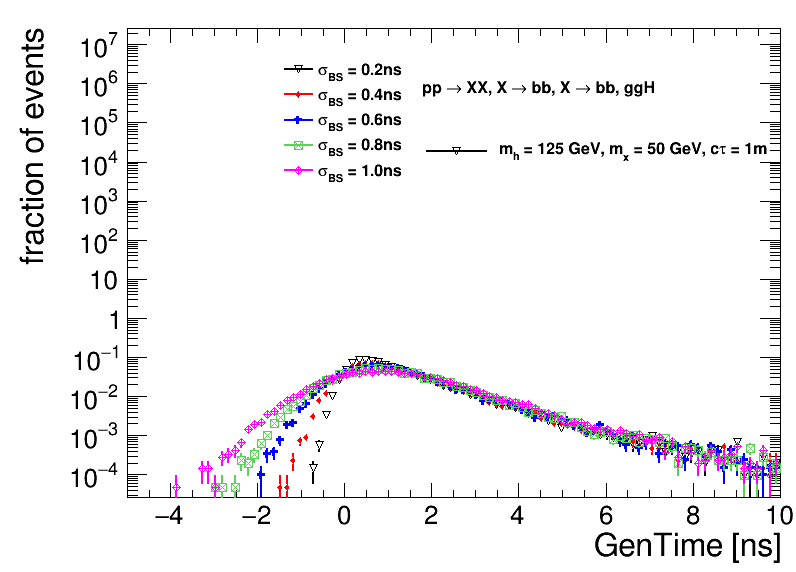

In [118]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.35,0.68,0.55,0.90);
leg1 = rt.TLegend(0.52,0.68,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hts1 = {}
SmearTime = {}
# print(len(tree))
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
        SmearTime[n] = np.random.normal(0,sig,len(BSTime))
        t = jetGenTime[:,0] - BSTime + SmearTime[n]
        hts1[n] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k+str(j), binning=[100,-5,10], weights = weight)
        hts1[n].SetLineColor(std_color_list[j])
        hts1[n].GetYaxis().SetRangeUser(1e-5,1e7)
        hts1[n].SetMarkerColor(std_color_list[j])
        hts1[n].SetMarkerStyle(22+n)

        if i==2:
            leg.AddEntry(hts1[n],'#sigma_{BS} = '+str(sig)+'ns')
#             leg.AddEntry(hs[n],k)
#         if j ==0:
        if i ==2 and j==0:
            leg1.AddEntry(hts1[n],texs[k])
#         leg.AddEntry(hs[n],k+' #sigma_{BS} = '+str(sig)+'ns')
        if i==2:
            hts1[n].DrawNormalized('LPsame')
    
    i += 1

leg.SetBorderSize(0)
leg1.SetBorderSize(0)

leg1.SetHeader(str(MODEL))
leg.Draw()
leg1.Draw()
c.SetLogy()
# c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_3_leading.png')
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_3_leading.pdf')

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
0 0 0.2 50973
0 1 0.4 50973
0 2 0.6 50973
0 3 0.8 50973
0 4 1.0 50973
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
1 0 0.2 17362
1 1 0.4 17362
1 2 0.6 17362
1 3 0.8 17362
1 4 1.0 17362
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
2 0 0.2 50918
2 1 0.4 50918
2 2 0.6 50918
2 3 0.8 50918
2 4 1.0 50918


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/JetGenTime_MinusBS_PlusSmearS_3_leading_mix.png has been created


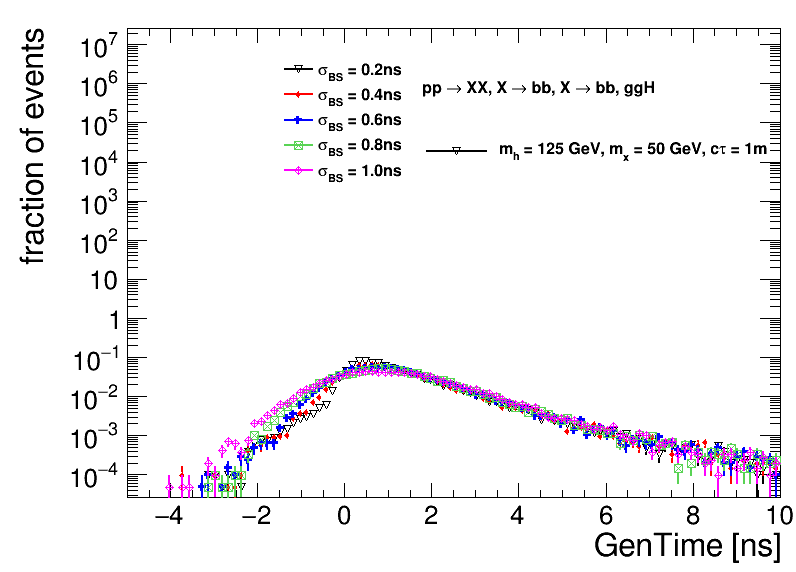

In [37]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.35,0.68,0.55,0.90);
leg1 = rt.TLegend(0.52,0.68,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hts1 = {}
SmearTime = {}
# print(len(tree))
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()
#     print(len(BSTime))
#     LLP_Time = v['gLLP_travel_time'].array()
#     LLP_daughter_Time = v['gLLP_daughter_travel_time'].array()
#     photon_Time = v['photon_travel_time'].array()
    weight = v['genWeight'].array()
    for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
        print(i,j,sig,len(BSTime))
        SmearTime[n] = np.concatenate((np.random.normal(0,sig,int(0.8*len(BSTime))),np.random.normal(0,1.0,int(1+0.2*len(BSTime)))),axis=None)
#         SmearTime[n] = np.random.normal(0,sig,len(BSTime))
        t = jetGenTime[:,0] - BSTime + SmearTime[n]
        hts1[n] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k+str(j), binning=[100,-5,10], weights = weight)
        hts1[n].SetLineColor(std_color_list[j])
        hts1[n].GetYaxis().SetRangeUser(1e-5,1e7)
        hts1[n].SetMarkerColor(std_color_list[j])
        hts1[n].SetMarkerStyle(22+n)

        if i==2:
            leg.AddEntry(hts1[n],'#sigma_{BS} = '+str(sig)+'ns')
#             leg.AddEntry(hs[n],k)
#         if j ==0:
        if i ==2 and j==0:
            leg1.AddEntry(hts1[n],texs[k])
#         leg.AddEntry(hs[n],k+' #sigma_{BS} = '+str(sig)+'ns')
        if i==2:
            hts1[n].DrawNormalized('LPsame')
    
    i += 1

leg.SetBorderSize(0)
leg1.SetBorderSize(0)

leg1.SetHeader(str(MODEL))
leg.Draw()
leg1.Draw()
c.SetLogy()
# c.Update()
c.Draw()
c.SaveAs(out_dir+'JetGenTime_MinusBS_PlusSmearS_3_leading_mix.png')


# Smear jet time cut

In [5]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
sigma = [0.2,0.4,0.6,0.8,1.]
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0

Firsts = []
Seconds = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   

#         print(i, k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()

    jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
#     print(jetGenTime[0],BSTime[0], jetTime[0])\


    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    for j,sig in enumerate(sigma):
#     for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
#         print('n',n)
        print(i, j, n,len(weight))
        SmearTime = np.random.normal(0,sig,len(BSTime))
        jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
#         print(jetTime[0],SmearTime[0], jetNewTime[0])    

    
        jetTime_most_delayed = []
        jetTime_second_delayed = []

        for evt, (time, pt) in enumerate(zip(jetNewTime,jetPt)):
    #         print(i,time,pt,len(time),len(pt))
            time_s =[]
            pt_s= []
            for par in range(len(time)):
    #             print(j,pt[j])
                time_s.append(time[par])
                pt_s.append(pt[par])
    #         print(i,time_s)
    #         print(i,pt_s)
            validpairlist = sort_valid_lists(time_s,pt_s)
    #         print(i,validpairlist)
    #         print(validpairlist[-1][0])
            if len(validpairlist)>1 :
    #             print(i,len(validpairlist))
    #             print(i,validpairlist[-1][0],validpairlist[-2][0])
                jetTime_most_delayed.append(validpairlist[-1][0])
                jetTime_second_delayed.append(validpairlist[-2][0])
            else:
                jetTime_most_delayed.append(-666)
                jetTime_second_delayed.append(-666)
#             if i>2:
#                 break
        jetTime_most_delayed = np.array(jetTime_most_delayed)
        jetTime_second_delayed = np.array(jetTime_second_delayed)
#         print(i, j, n,len(jetTime_most_delayed),len(jetTime_second_delayed))
    
        Firsts.append(jetTime_most_delayed)
        Seconds.append(jetTime_second_delayed)
#         print(n,'found max jet gen time')

    i += 1
    
Firsts = np.array(Firsts)
Seconds = np.array(Seconds)
print('found max, second jet gen time')
print(len(Firsts),len(Seconds))


19
5
3
0 0 0 50973
0 1 1 50973
0 2 2 50973
0 3 3 50973
0 4 4 50973
1 0 5 17362
1 1 6 17362
1 2 7 17362
1 3 8 17362
1 4 9 17362
2 0 10 50918
2 1 11 50918
2 2 12 50918
2 3 13 50918
2 4 14 50918
found max, second jet gen time
15 15


In [6]:
i = 0
Power_1j = []
Power_2j = []

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,sig in enumerate(sigma):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+j
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts[n] 
        jetGenTime_second = Seconds[n] 
        print(len(weight),len(Firsts[n]),len(Seconds[n]))
        
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)
    #         print(tcut_string)
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
            Ntotal_1j_w = np.sum(weight1_cut666)
            Ntotal_2j_w = np.sum(weight_cut666)
    #         print('1j total',Ntotal_1j_w)
    #         print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]
    #         Nsel_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.sum(tcutted_w1_v)
            Nsel_2j_w = np.sum(tcutted_w_v)
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j.append(Power_eff_1j)
        Power_2j.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j = np.array(Power_1j)
Power_2j = np.array(Power_2j)
print(Power_1j)
print(Power_2j)


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f1b96d2af98>
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f1b962efeb8>
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f1b961af518>
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
[[1.         1.         1.         1.         1.         1.
  1.         0.99862204 0.9942914  0.97844491 0.94320871 0.88474414
  0.82185037 0.75797243 0.69547245 0.43730321 0.27598428 0.18996062
  0.13444884]
 [1.         1.         1.         1.         0.9996063  0.99862204
  0.99655514 0.99035437 0.97736219 0.95177169 0.91653541 0.86801178
  0.8156496  0.75659456 0.69714565 0.44507875 0.28041343 0.19005905
  0.13356301]
 [1.         1.         1.         1.         0.99557089 0.99202757
  0.98474407 0.97421257 0.95620081 0.92755907 0.892

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f1b96d2af98>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f1b962efeb8>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f1b961af518>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear.pdf has been created


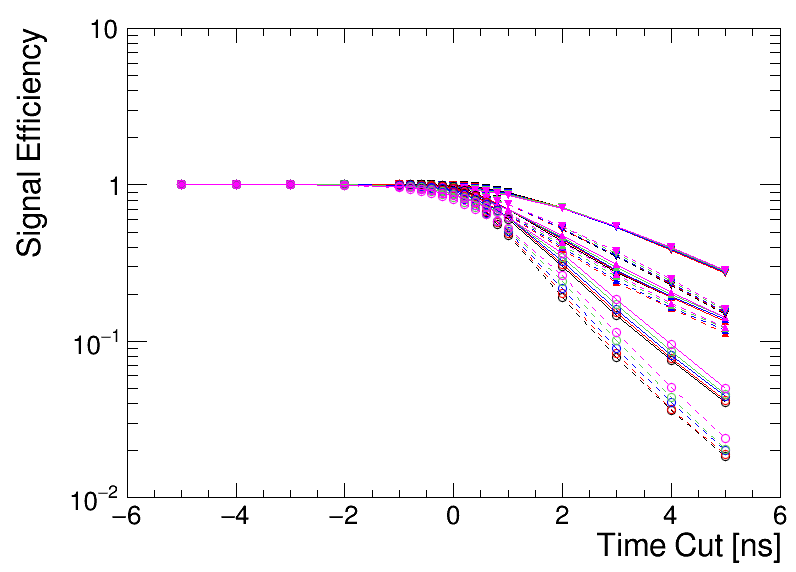

In [7]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg.AddEntry(h1s[i],k+' One jet')
        leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if i==0 :
            h1s[i].Draw('ALPsame')
        else:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
    
    n += 1


# leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f1b96d2af98>
0 0.2
0 0 0
1 0.4
0 1 1
2 0.6
0 2 2
3 0.8
0 3 3
4 1.0
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f1b962efeb8>
0 0.2
1 0 5
1 0.4
1 1 6
2 0.6
1 2 7
3 0.8
1 3 8
4 1.0
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f1b961af518>
0 0.2
2 0 10
1 0.4
2 1 11
2 0.6
2 2 12
3 0.8
2 3 13
4 1.0
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_2line.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_2line.pdf has been created


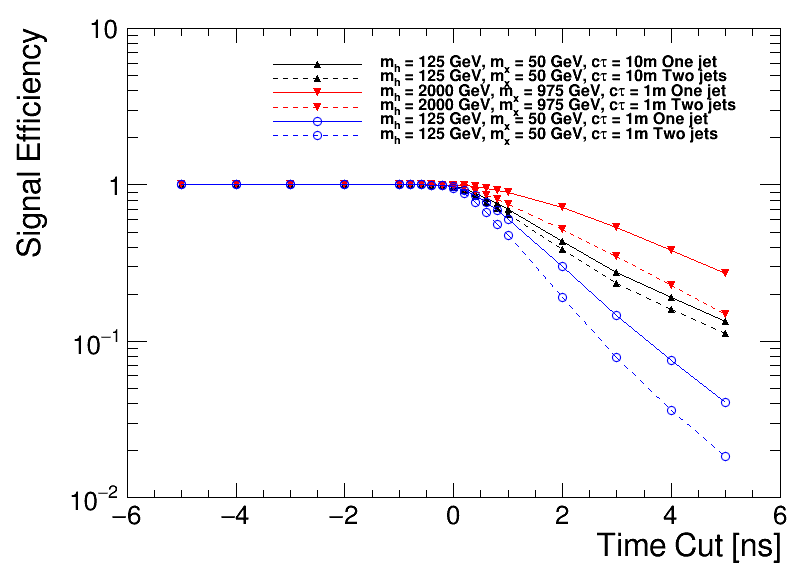

In [9]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.75,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
        print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
 

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and i==0 :
            h1s[i].Draw('ALPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],texs[k]+' One jet')
            leg.AddEntry(h2s[i],texs[k]+' Two jets')
        elif j==0:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],texs[k]+' One jet')
            leg.AddEntry(h2s[i],texs[k]+' Two jets')
    
    n += 1


leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_2line.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_2line.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_2line.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_2line.pdf has been created


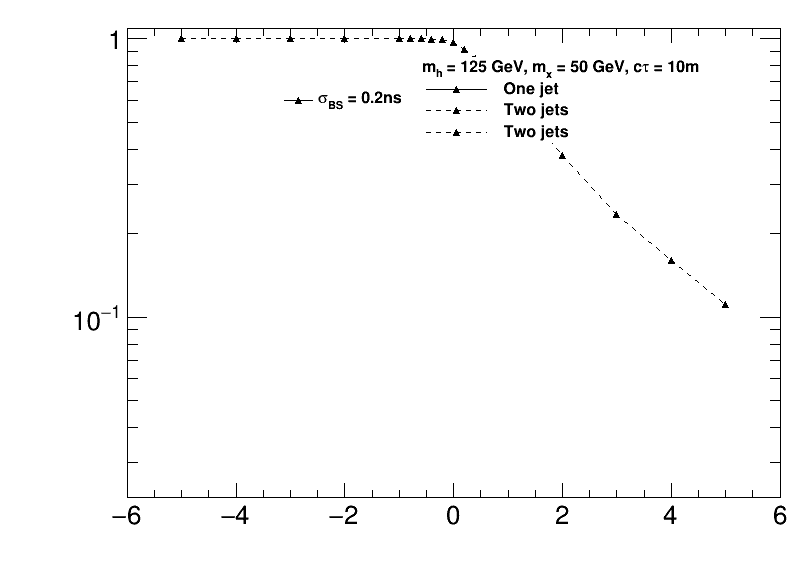

In [129]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==0 and j==0:
            h1s[i].Draw('ALPsame')
            h2s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         elif n==0:
#             h1s[i].Draw('LPsame')
#             h2s[i].Draw('LPsame')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_2line.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_2line.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1.pdf has been created


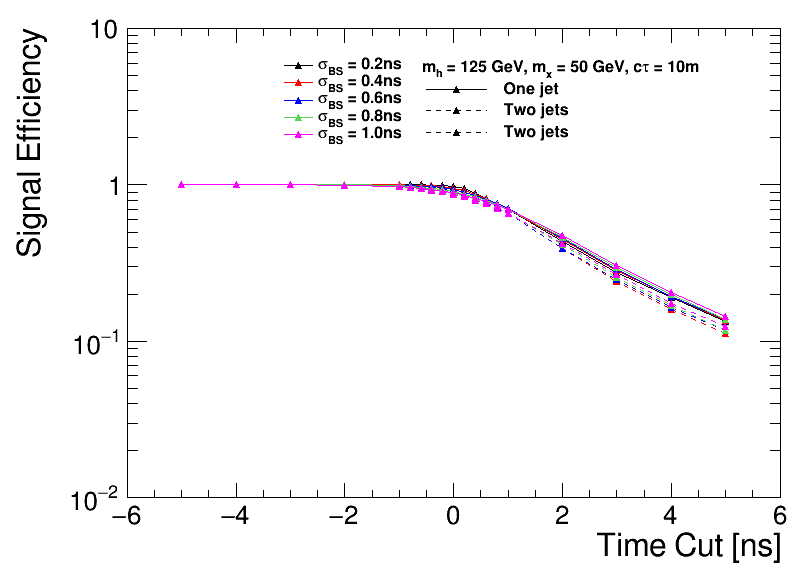

In [125]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==0 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==0:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2.pdf has been created


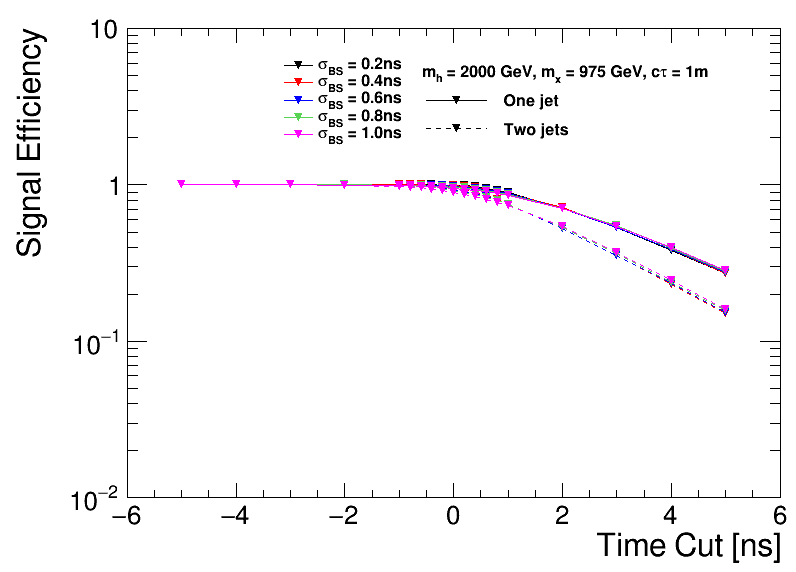

In [126]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==1 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==1:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3.pdf has been created


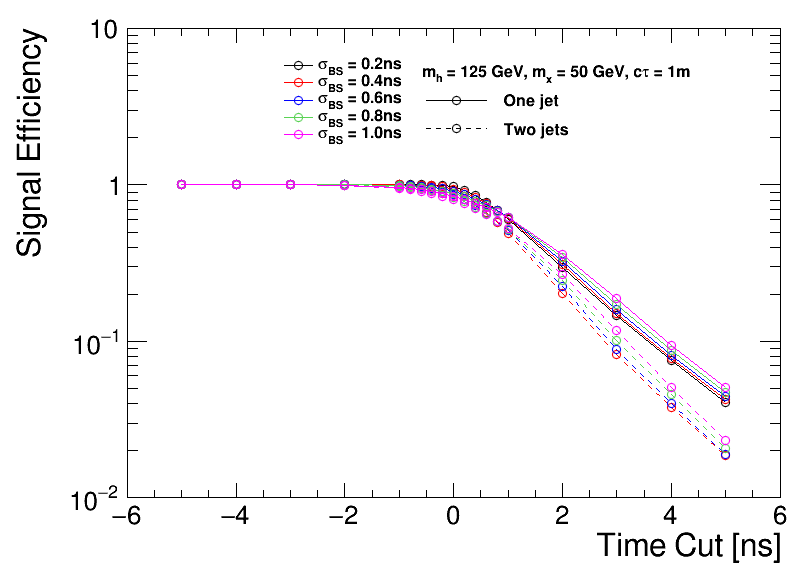

In [127]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==2 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==2:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_2line.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_2line.pdf has been created


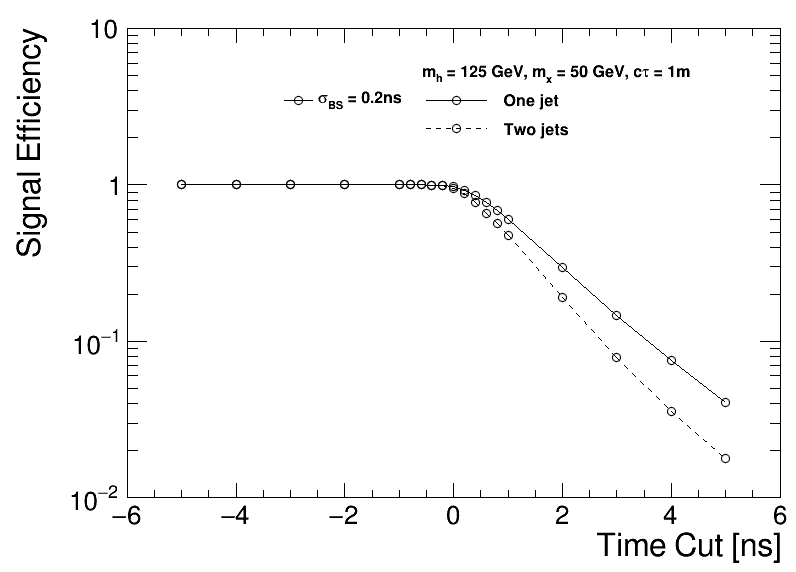

In [131]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==2 and j==0:
            h1s[i].Draw('ALPsame')
            h2s[i].Draw('LPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         elif n==2:
#             h1s[i].Draw('LPsame')
#             h2s[i].Draw('LPsame')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_2line.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_2line.pdf')


bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f99480d7f60>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9903c17668>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f990319e588>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_1jet.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_1jet.pdf has been created


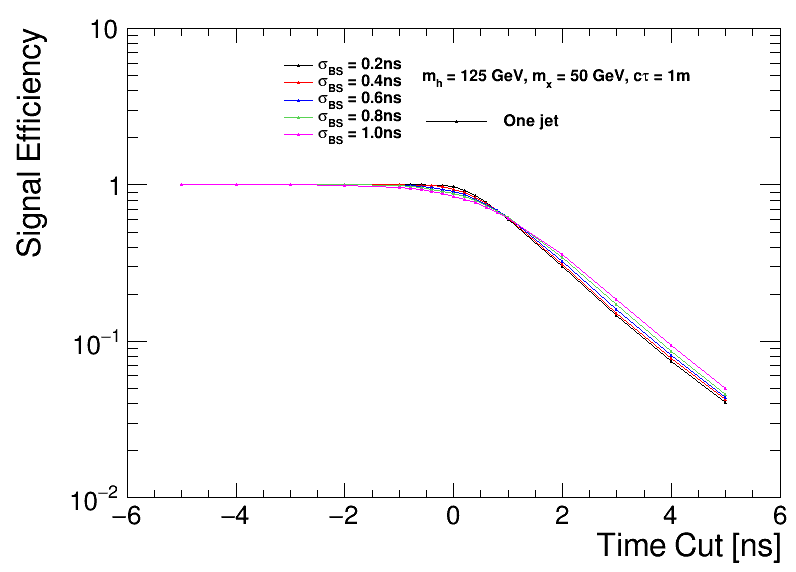

In [80]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==0 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             leg1.AddEntry(h2s[i],' Two jets')
        elif n==0:
            h1s[i].Draw('LPsame')
#             h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_1jet.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_1jet.pdf')


bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f99480d7f60>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9903c17668>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f990319e588>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_2jet.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_2jet.pdf has been created


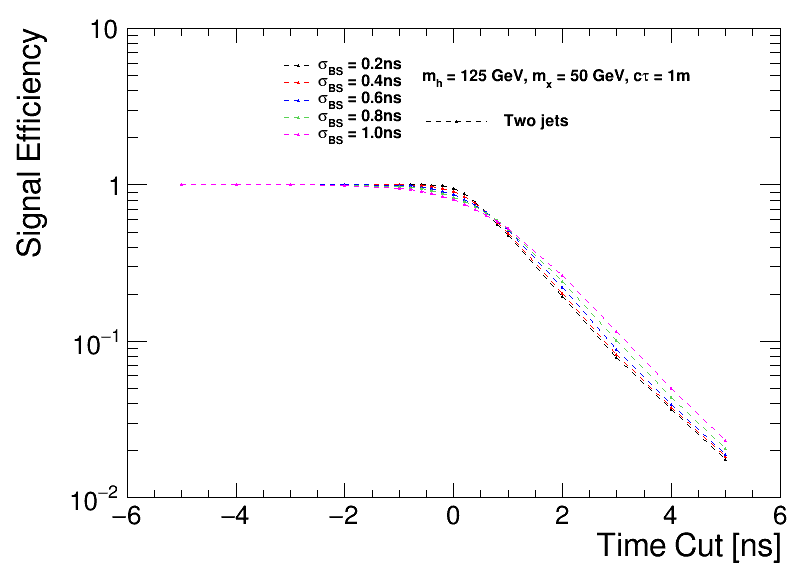

In [81]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h2s[i].SetTitle( 'Signal Efficiency' )
        h2s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h2s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h2s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==0 and j==0:
            h2s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==0:
#             h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_2jet.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_2jet.pdf')


bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f99480d7f60>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9903c17668>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f990319e588>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2_1jet.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2_1jet.pdf has been created


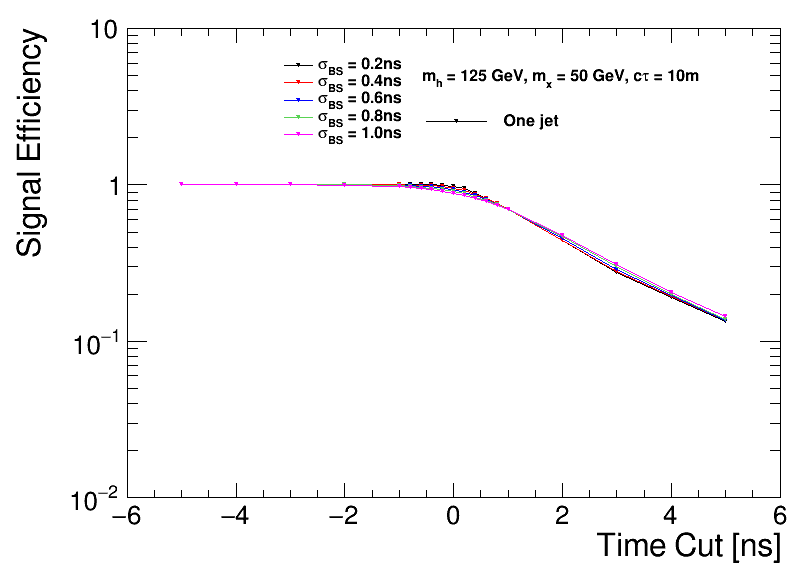

In [82]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==1 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             leg1.AddEntry(h2s[i],' Two jets')
        elif n==1:
            h1s[i].Draw('LPsame')
#             h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2_1jet.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2_1jet.pdf')


bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f99480d7f60>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9903c17668>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f990319e588>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2_2jet.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2_2jet.pdf has been created


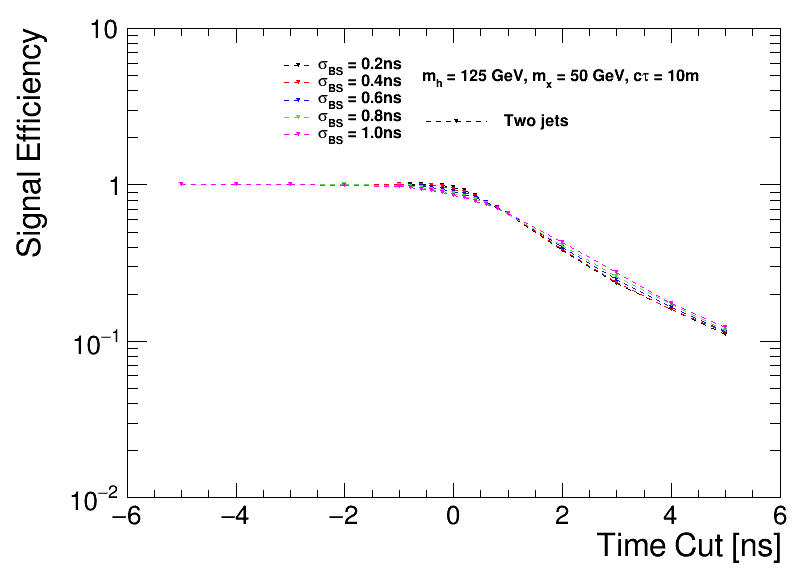

In [83]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h2s[i].SetTitle( 'Signal Efficiency' )
        h2s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h2s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h2s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==1 and j==0:
            h2s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==1:
#             h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2_2jet.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2_2jet.pdf')


bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f99480d7f60>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9903c17668>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f990319e588>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_1jet.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_1jet.pdf has been created


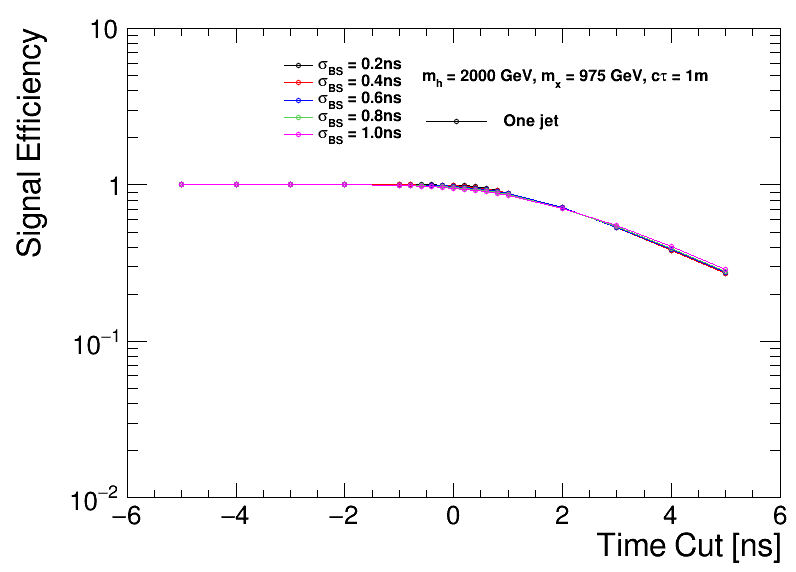

In [78]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==2 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             leg1.AddEntry(h2s[i],' Two jets')
        elif n==2:
            h1s[i].Draw('LPsame')
#             h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_1jet.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_1jet.pdf')


bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f99480d7f60>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9903c17668>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f990319e588>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_2jet.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_2jet.pdf has been created


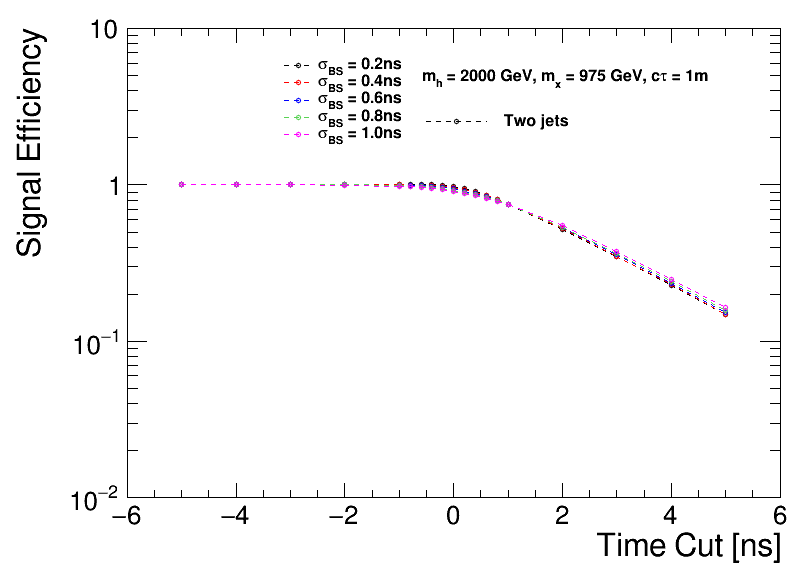

In [79]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h2s[i].SetTitle( 'Signal Efficiency' )
        h2s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h2s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h2s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==2 and j==0:
            h2s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==2:
#             h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_2jet.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_2jet.pdf')


# Decay before ECAL volume

In [9]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
sigma = [0.2,0.4,0.6,0.8,1.]
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0

Firsts_ecal = []
Seconds_ecal = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   

#         print(i, k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()

    jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
#     print(jetGenTime[0],BSTime[0], jetTime[0])

    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    for j,sig in enumerate(sigma):
#     for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
#         print('n',n)
        print(i, j, n,len(weight))
        SmearTime = np.random.normal(0,sig,len(BSTime))
        jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
#         print(jetTime[0],SmearTime[0], jetNewTime[0])    

    
        jetTime_most_delayed = []
        jetTime_second_delayed = []

        for evt, (time, pt) in enumerate(zip(jetNewTime,jetPt)):
    #         print(i,time,pt,len(time),len(pt))
            time_s =[]
            pt_s= []
            for par in range(len(time)):
    #             print(j,pt[j])
                time_s.append(time[par])
                pt_s.append(pt[par])
    #         print(i,time_s)
    #         print(i,pt_s)
            validpairlist = sort_valid_lists(time_s,pt_s)
    #         print(i,validpairlist)
    #         print(validpairlist[-1][0])
            if len(validpairlist)>1 :
    #             print(i,len(validpairlist))
    #             print(i,validpairlist[-1][0],validpairlist[-2][0])
                jetTime_most_delayed.append(validpairlist[-1][0])
                jetTime_second_delayed.append(validpairlist[-2][0])
            else:
                jetTime_most_delayed.append(-666)
                jetTime_second_delayed.append(-666)
#             if i>2:
#                 break
        jetTime_most_delayed = np.array(jetTime_most_delayed)
        jetTime_second_delayed = np.array(jetTime_second_delayed)
#         print(i, j, n,len(jetTime_most_delayed),len(jetTime_second_delayed))
    
        Firsts_ecal.append(jetTime_most_delayed)
        Seconds_ecal.append(jetTime_second_delayed)
#         print(n,'found max jet gen time')

    i += 1
    
Firsts_ecal = np.array(Firsts_ecal)
Seconds_ecal = np.array(Seconds_ecal)
print('found max, second jet gen time')
print(len(Firsts_ecal),len(Seconds_ecal))


19
5
3
0 0 0 50973
0 1 1 50973
0 2 2 50973
0 3 3 50973
0 4 4 50973
1 0 5 17362
1 1 6 17362
1 2 7 17362
1 3 8 17362
1 4 9 17362
2 0 10 50918
2 1 11 50918
2 2 12 50918
2 3 13 50918
2 4 14 50918
found max, second jet gen time
15 15


In [139]:
i = 0
Power_1j_ecal = []
Power_2j_ecal = []

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,sig in enumerate(sigma):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+j
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts_ecal[n] 
        jetGenTime_second = Seconds_ecal[n] 
        print(len(weight),len(Firsts_ecal[n]),len(Seconds_ecal[n]))
        
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)
    #         print(tcut_string)
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
#             Ntotal_1j_w = np.sum(weight1_cut666)          
#             Ntotal_2j_w = np.sum(weight_cut666)
#             Ntotal_1j_w = np.shape(weight1_cut666)[0]          
#             Ntotal_2j_w = np.shape(weight_cut666)[0]
            Ntotal_1j_w = nevts[k]          
            Ntotal_2j_w = nevts[k]
#             print('1j total',Ntotal_1j_w)
#             print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]
    #         Nsel_w = np.sum(tcutted_w_v)
#             Nsel_1j_w = np.sum(tcutted_w1_v)
#             Nsel_2j_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.shape(tcutted_w1_v)[0]
            Nsel_2j_w = np.shape(tcutted_w_v)[0]
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_ecal.append(Power_eff_1j)
        Power_2j_ecal.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_ecal = np.array(Power_1j_ecal)
Power_2j_ecal = np.array(Power_2j_ecal)
print(Power_1j_ecal)
print(Power_2j_ecal)


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
[[0.19932121 0.19932121 0.19932121 0.19932121 0.19932121 0.19932121
  0.19930159 0.19918388 0.19806564 0.1947894  0.18798187 0.17621094
  0.1636945  0.15041296 0.1378573  0.08710494 0.05475448 0.03798089
  0.02670041]
 [0.19932121 0.19932121 0.19932121 0.19932121 0.19924274 0.19896808
  0.19869343 0.19730053 0.19475016 0.1901595  0.1828419  0.1736998
  0.16296863 0.15047182 0.13877935 0.08830165 0.05557844 0.03805936
  0.02668079]
 [0.19932121 0.19932121 0.19932121 0.19932121 0.19865419 0.19779099
  0.19618229 0.19388696 0.1899437  0.1849802

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_Ecal.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_Ecal.pdf has been created


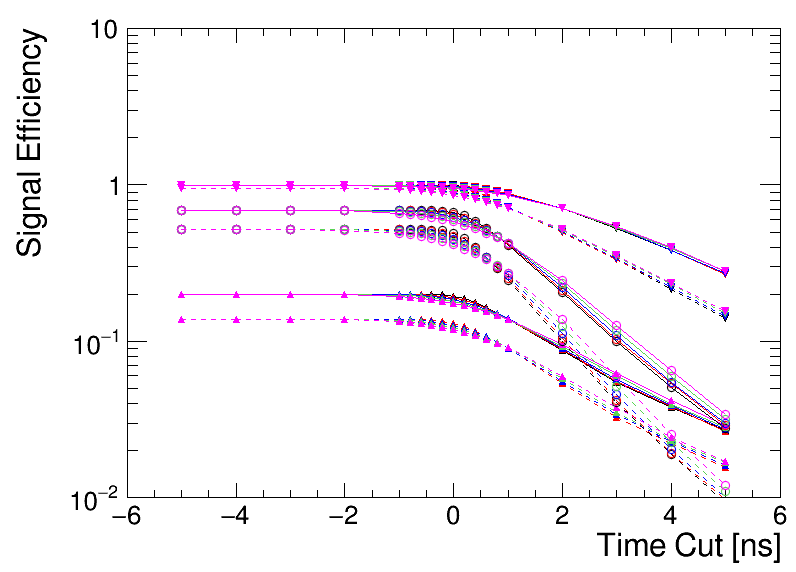

In [140]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_ecal[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_ecal[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg.AddEntry(h1s[i],k+' One jet')
        leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if i==0 :
            h1s[i].Draw('ALPsame')
        else:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
    
    n += 1


# leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_Ecal.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_Ecal.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_Ecal_2line.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_Ecal_2line.pdf has been created


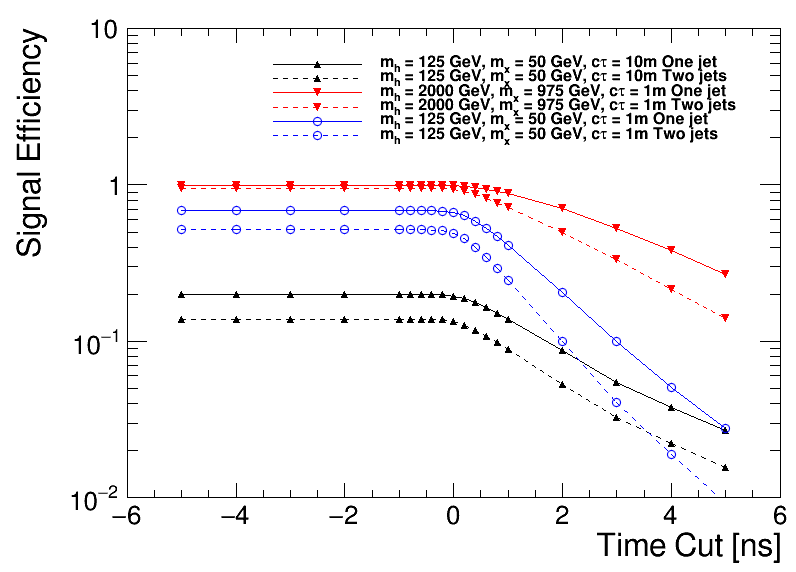

In [147]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.75,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_ecal[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_ecal[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if i==0 and j==0:
            h1s[i].Draw('ALPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],texs[k]+' One jet')
            leg.AddEntry(h2s[i],texs[k]+' Two jets')
        elif j==0:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],texs[k]+' One jet')
            leg.AddEntry(h2s[i],texs[k]+' Two jets')
    
    n += 1


leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_Ecal_2line.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_Ecal_2line.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79e13b70>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79c4d240>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79bd34a8>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_Ecal.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_Ecal.pdf has been created


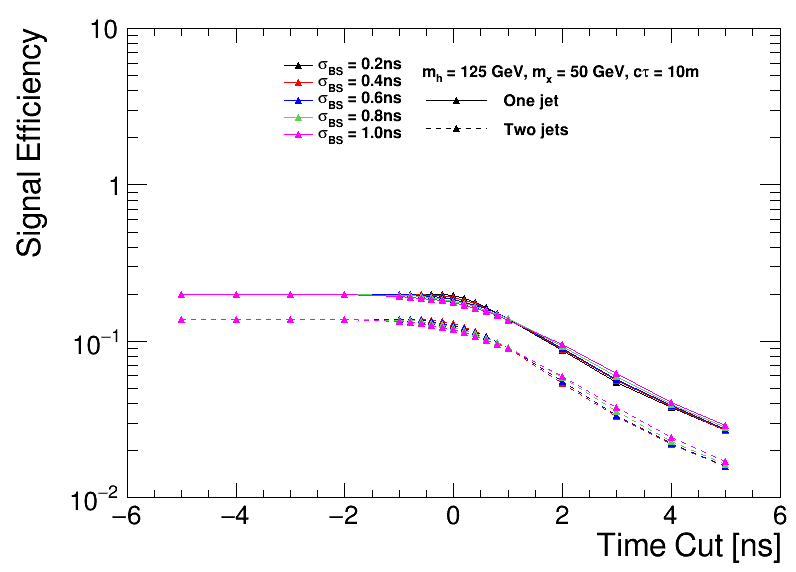

In [27]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_ecal[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_ecal[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==0 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==0:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_Ecal.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_Ecal.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79e13b70>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79c4d240>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79bd34a8>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2_Ecal.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2_Ecal.pdf has been created


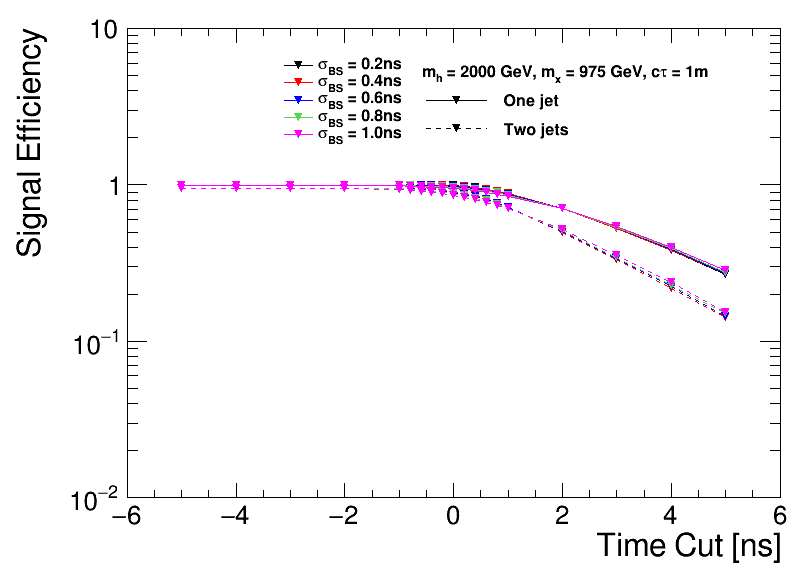

In [28]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_ecal[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_ecal[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==1 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==1:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2_Ecal.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2_Ecal.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79e13b70>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79c4d240>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79bd34a8>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_Ecal.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_Ecal.pdf has been created


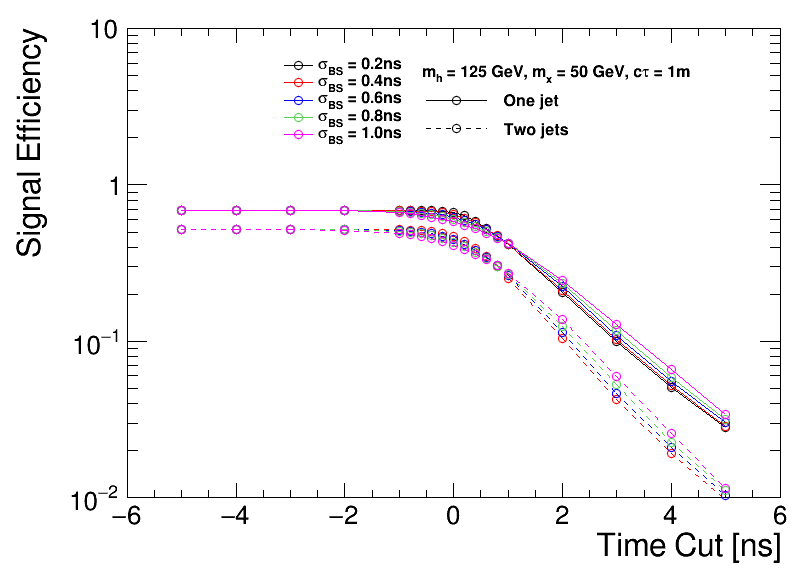

In [29]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_ecal[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_ecal[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==2 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==2:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_Ecal.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_Ecal.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79e13b70>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79c4d240>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79bd34a8>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_1jet_Ecal.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_1jet_Ecal.pdf has been created


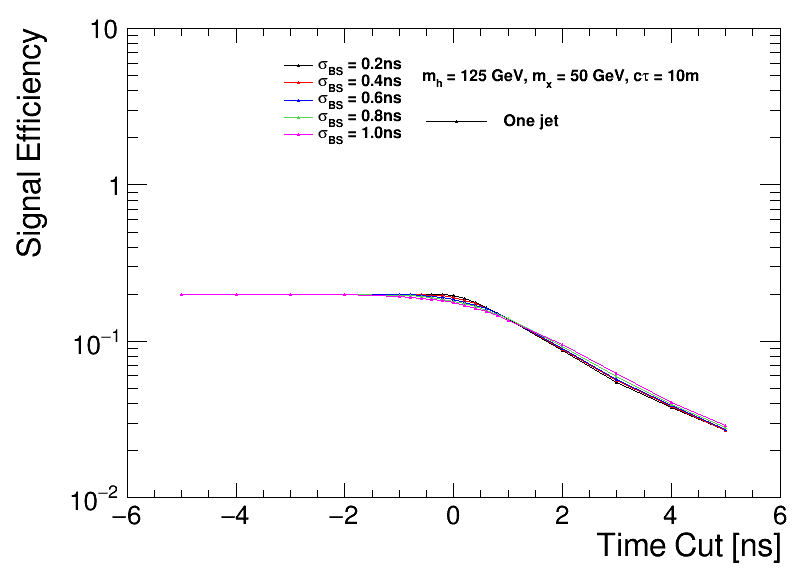

In [30]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_ecal[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_ecal[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==0 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             leg1.AddEntry(h2s[i],' Two jets')
        elif n==0:
            h1s[i].Draw('LPsame')
#             h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_1jet_Ecal.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_1jet_Ecal.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79e13b70>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79c4d240>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79bd34a8>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2_1jet_Ecal.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2_1jet_Ecal.pdf has been created


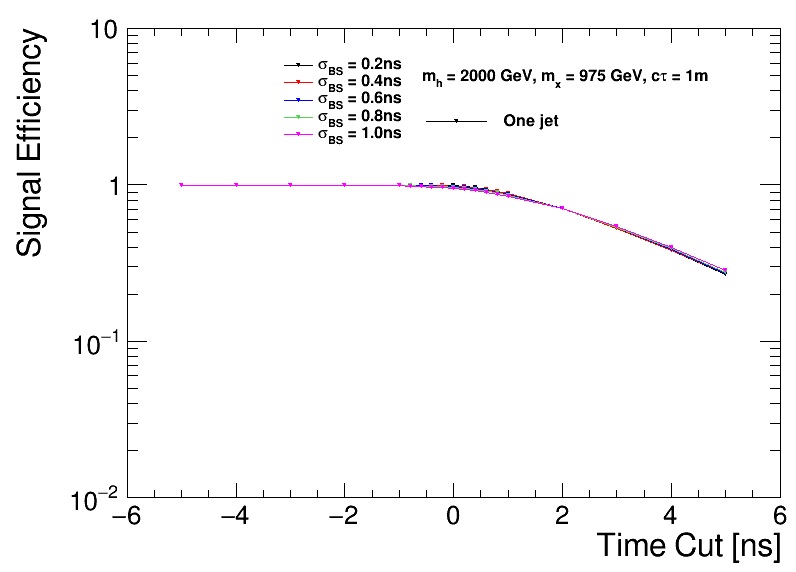

In [31]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_ecal[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_ecal[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==1 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             leg1.AddEntry(h2s[i],' Two jets')
        elif n==1:
            h1s[i].Draw('LPsame')
#             h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2_1jet_Ecal.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2_1jet_Ecal.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79e13b70>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79c4d240>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79bd34a8>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_1jet_Ecal.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_1jet_Ecal.pdf has been created


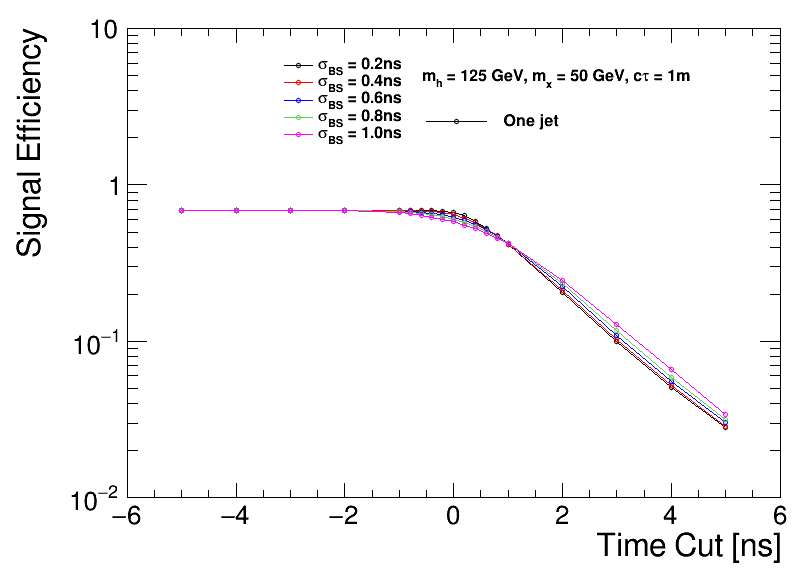

In [32]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_ecal[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_ecal[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==2 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             leg1.AddEntry(h2s[i],' Two jets')
        elif n==2:
            h1s[i].Draw('LPsame')
#             h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_1jet_Ecal.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_1jet_Ecal.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79e13b70>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79c4d240>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79bd34a8>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_2jet_Ecal.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_2jet_Ecal.pdf has been created


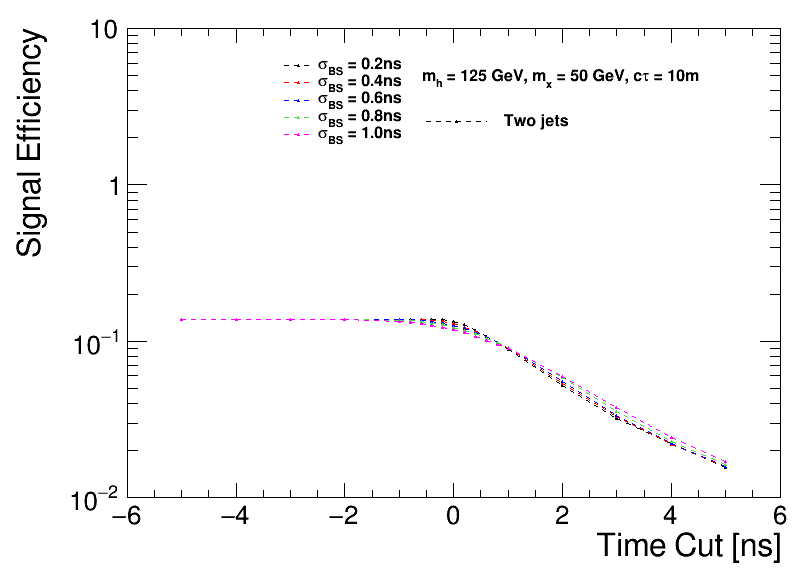

In [33]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_ecal[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_ecal[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h2s[i].SetTitle( 'Signal Efficiency' )
        h2s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h2s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h2s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==0 and j==0:
            h2s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==0:
#             h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_2jet_Ecal.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_2jet_Ecal.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79e13b70>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79c4d240>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79bd34a8>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2_2jet_Ecal.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2_2jet_Ecal.pdf has been created


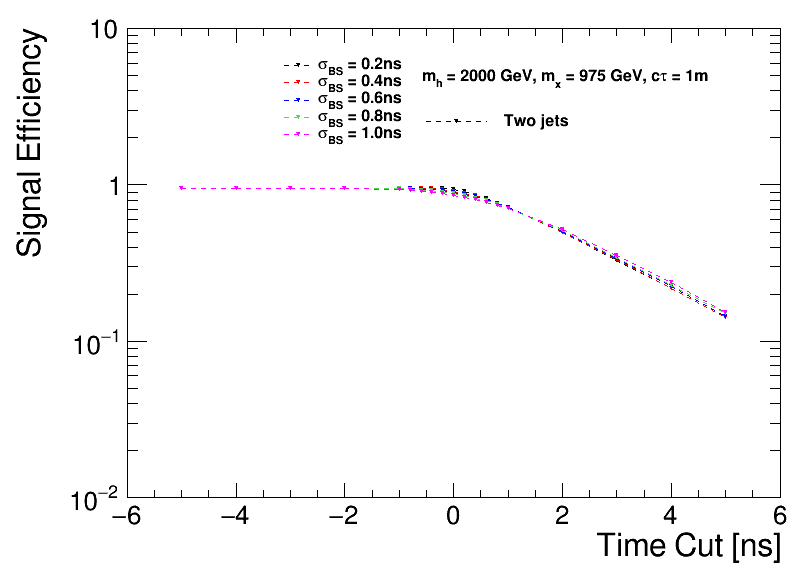

In [34]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_ecal[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_ecal[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h2s[i].SetTitle( 'Signal Efficiency' )
        h2s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h2s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h2s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==1 and j==0:
            h2s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==1:
#             h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2_2jet_Ecal.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2_2jet_Ecal.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79e13b70>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79c4d240>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79bd34a8>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_2jet_Ecal.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_2jet_Ecal.pdf has been created


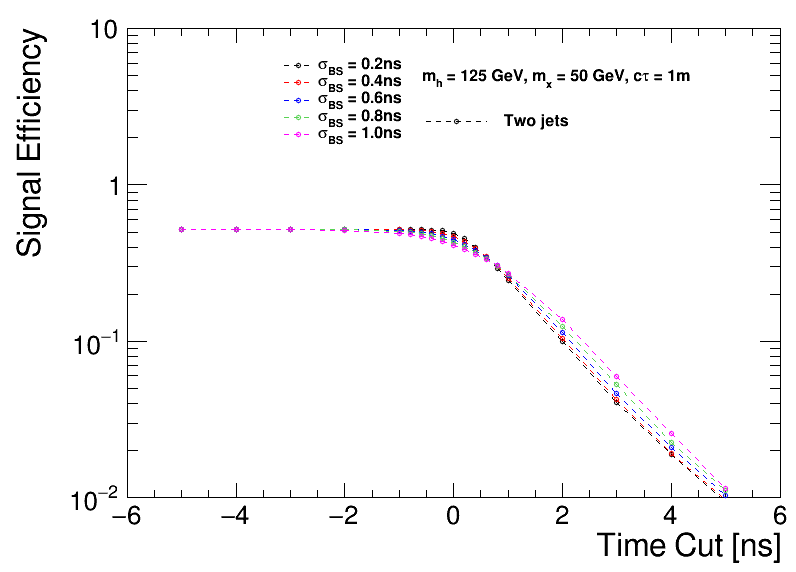

In [35]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_ecal[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_ecal[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h2s[i].SetTitle( 'Signal Efficiency' )
        h2s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h2s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h2s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==2 and j==0:
            h2s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==2:
#             h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_2jet_Ecal.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_2jet_Ecal.pdf')


# Real trigger case (Pt & Time)

In [11]:
i = 0

Pt_maxes = []
Pt_seconds = []
for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    jetPt = v['gLLP_daughter_pt'].array()
    
    jetPt = np.array(jetPt)
    
    maxes = jetPt[:,0]
    seconds = jetPt[:,1]
#     print(jetPt[0],maxes[0],seconds[0])
#     print(jetPt[1],maxes[1],seconds[1])
    
    maxes = np.array(maxes)
    seconds = np.array(seconds)
    print(i, len(weight), len(maxes),len(seconds))    

    Pt_maxes.append(maxes)
    Pt_seconds.append(seconds)
    
    i += 1

Pt_maxes = np.array(Pt_maxes)
Pt_seconds = np.array(Pt_seconds)
print('found max second Pts', len(Pt_maxes),len(Pt_seconds))

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
0 50973 50973 50973
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
1 17362 17362 17362
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
2 50918 50918 50918
found max second Pts 3 3


In [12]:
i = 0
Power_1j_trg = []
Power_2j_trg = []

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,sig in enumerate(sigma):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+j
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts_ecal[n] 
        jetGenTime_second = Seconds_ecal[n] 
        print(len(weight),len(Firsts_ecal[n]),len(Seconds_ecal[n]))
        
        jetPt_max = Pt_maxes[i] 
        jetPt_second = Pt_seconds[i] 
        print(len(weight),len(Pt_maxes[i]),len(Pt_seconds[i]))
        
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)
            
            ptcut_string1 = np.logical_and( jetPt_max > 60, jetPt_max>-600)
            ptcut_string2 = np.logical_and( jetPt_second > 60, jetPt_second>-600)
            ptcut_string = np.logical_and( ptcut_string1, ptcut_string2)
           
            cut_string = np.logical_and( ptcut_string1, tcut_string)
            cut_string1 = np.logical_and( ptcut_string1, tcut_string1)
            cut_string2 = np.logical_and( ptcut_string2, tcut_string2)
            

            Ntotal_1j_w = nevts[k]          
            Ntotal_2j_w = nevts[k]
#             print('1j total',Ntotal_1j_w)
#             print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]
            
            ptcutted_w_v = weight[ptcut_string]
            ptcutted_w1_v = weight[ptcut_string1]
            ptcutted_w2_v = weight[ptcut_string2]
            
            
            cutted_w_v = weight[cut_string]
            cutted_w1_v = weight[cut_string1]
            cutted_w2_v = weight[cut_string2]
            
            
    #         Nsel_w = np.sum(tcutted_w_v)
#             Nsel_1j_w = np.sum(tcutted_w1_v)
#             Nsel_2j_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.shape(cutted_w1_v)[0]
            Nsel_2j_w = np.shape(cutted_w_v)[0]
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_trg.append(Power_eff_1j)
        Power_2j_trg.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_trg = np.array(Power_1j_trg)
Power_2j_trg = np.array(Power_2j_trg)
print(Power_1j_trg)
print(Power_2j_trg)


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
[[5.86585055e-03 5.86585055e-03 5.86585055e-03 5.86585055e-03
  5.86585055e-03 5.86585055e-03 5.86585055e-03 5.86585055e-03
  5.80699586e-03 5.68928649e-03 5.25768544e-03 4.76722971e-03
  4.08059169e-03 3.60975418e-03 3.19777137e-03 2.11876876e-03
  1.41251251e-03 1.25556667e-

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_trg.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_trg.pdf has been created


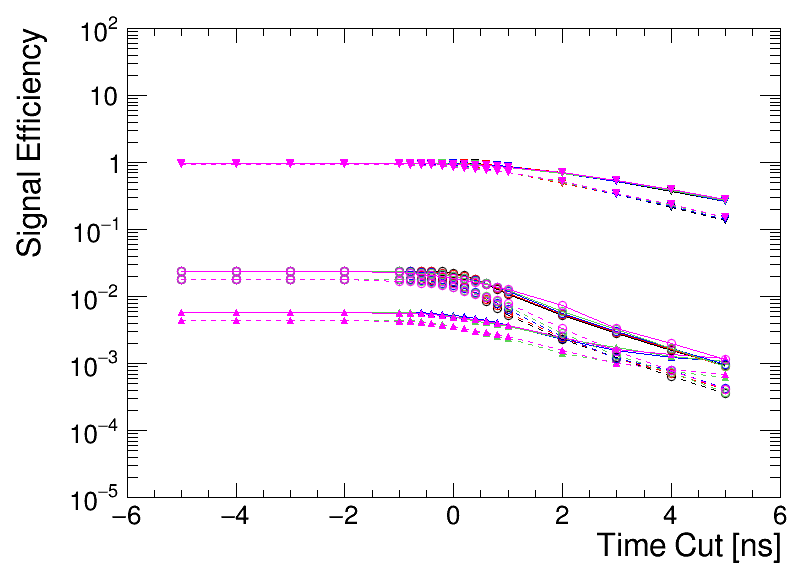

In [185]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_trg[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_trg[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg.AddEntry(h1s[i],k+' One jet')
        leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if i==2 :
            h1s[i].Draw('ALPsame')
        else:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
    
    n += 1


# leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_trg.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_trg.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_trg.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_trg.pdf has been created


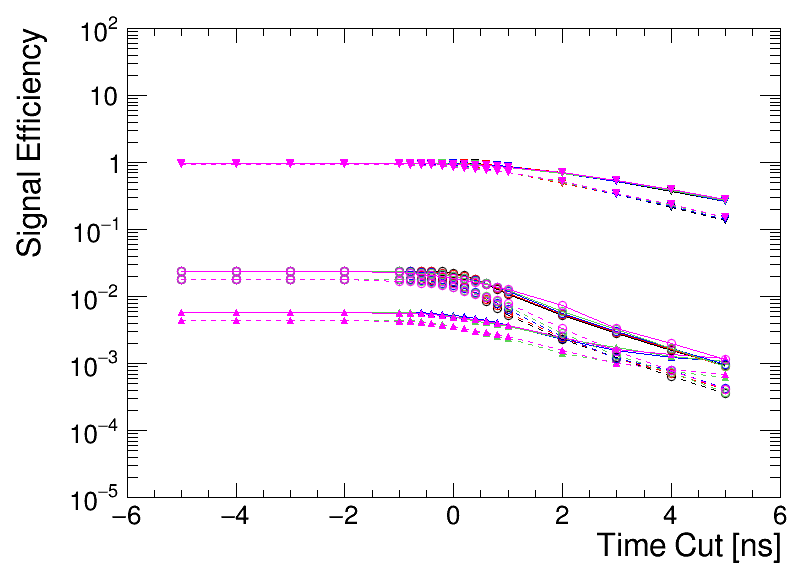

In [186]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_trg[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_trg[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg.AddEntry(h1s[i],k+' One jet')
        leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if i==2 :
            h1s[i].Draw('ALPsame')
        else:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
    
    n += 1


# leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_trg.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_trg.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_trg_2line.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_trg_2line.pdf has been created


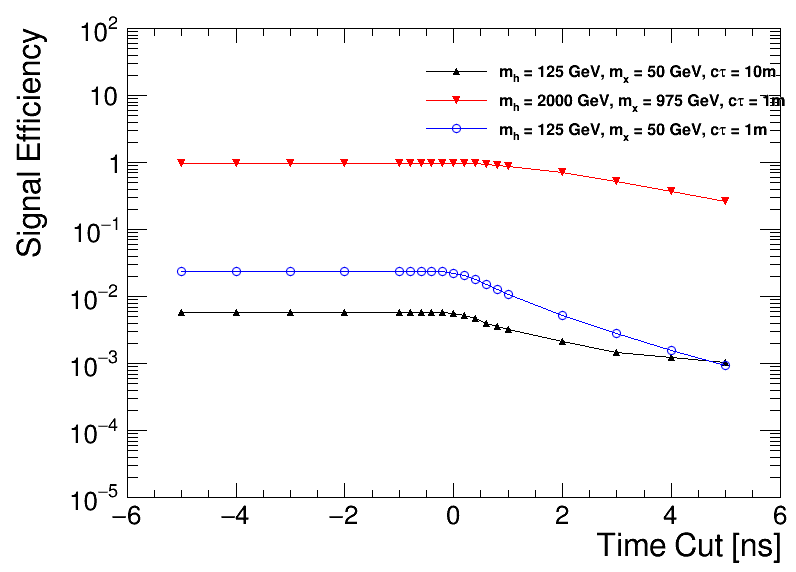

In [187]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_trg[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_trg[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==0 :
            h1s[i].Draw('ALPsame')
        elif j==0:
            h1s[i].Draw('LPsame')
            
        if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if j==0:
            leg1.AddEntry(h1s[i],texs[k])
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_trg_2line.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_trg_2line.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_trg.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_trg.pdf has been created


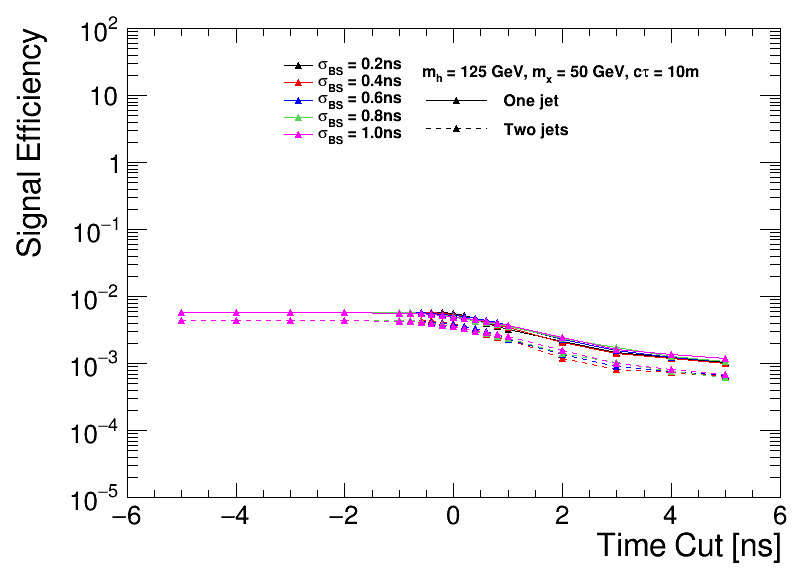

In [153]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_trg[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_trg[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==0 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==0:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_trg.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_trg.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_trg.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_trg.pdf has been created


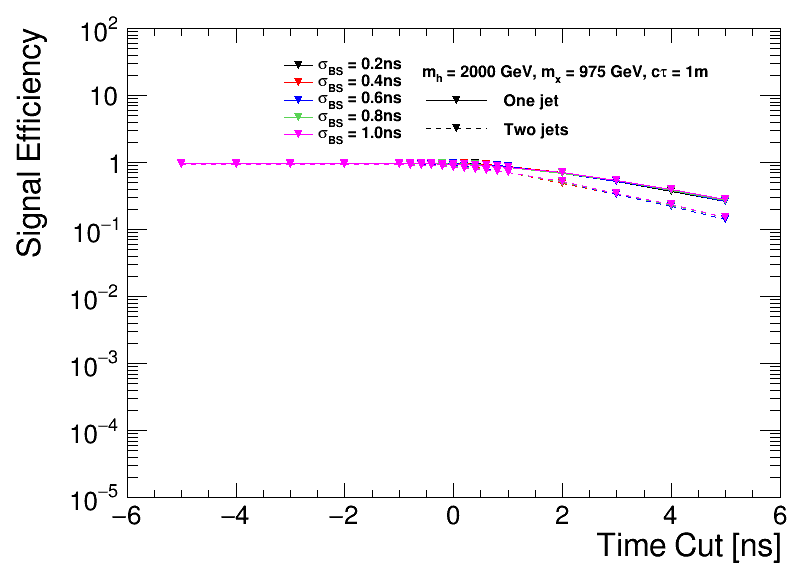

In [154]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_trg[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_trg[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==1 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==1:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_trg.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_trg.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_trg.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_trg.pdf has been created


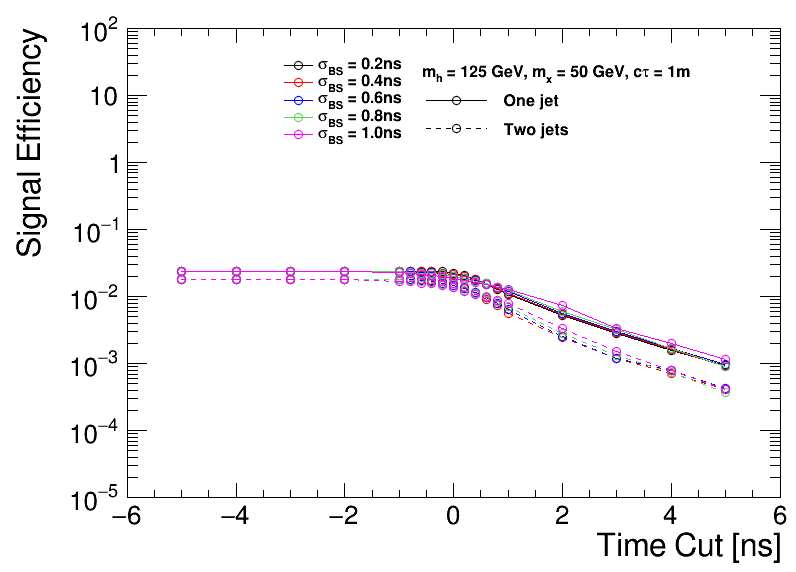

In [155]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_trg[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_trg[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==2 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
        elif n==2:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_trg.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_trg.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_1jet_trg.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear1_1jet_trg.pdf has been created


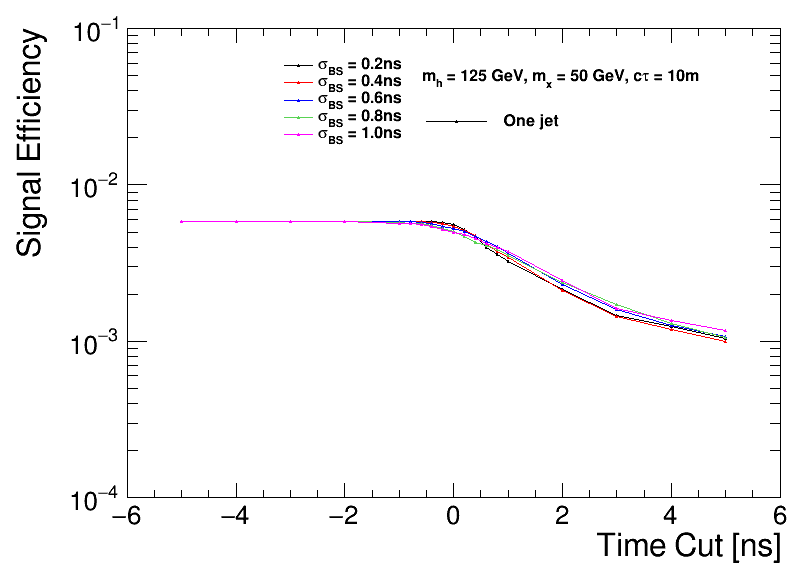

In [156]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_trg[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_trg[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==0 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            h1s[i].GetYaxis().SetRangeUser(1e-4,1e-1)
#             leg1.AddEntry(h2s[i],' Two jets')
        elif n==0:
            h1s[i].Draw('LPsame')
#             h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_1jet_trg.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear1_1jet_trg.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2_1jet_trg.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear2_1jet_trg.pdf has been created


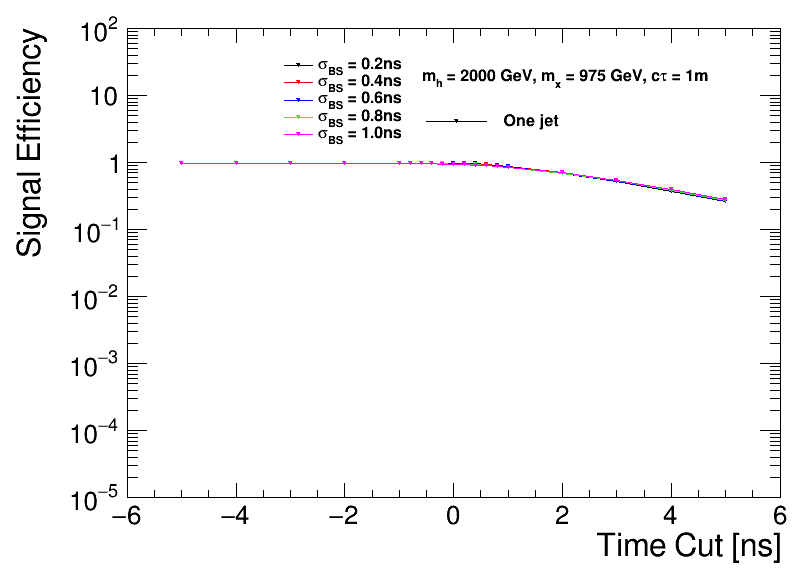

In [157]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_trg[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_trg[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==1 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
#             leg1.AddEntry(h2s[i],' Two jets')
        elif n==1:
            h1s[i].Draw('LPsame')
#             h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2_1jet_trg.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear2_1jet_trg.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4f79b0f978>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4f79b0f940>
1 0 5
1 1 6
1 2 7
1 3 8
1 4 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4f79110f98>
2 0 10
2 1 11
2 2 12
2 3 13
2 4 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_1jet_trg.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear3_1jet_trg.pdf has been created


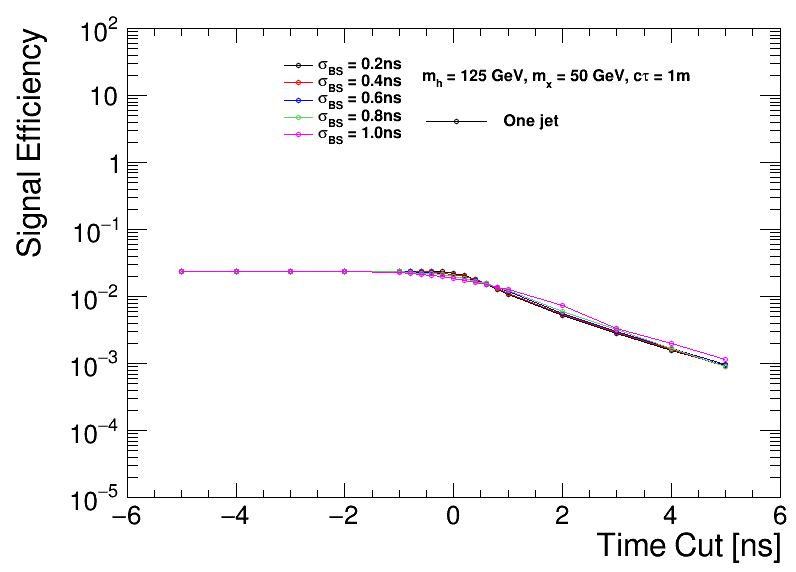

In [158]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_trg[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_trg[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].SetMarkerSize(0.5)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[j])
        h2s[i].SetMarkerColor(std_color_list[j])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].SetMarkerSize(0.5)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if n==2 and j==0:
            h1s[i].Draw('ALPsame')
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],' One jet')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
#             leg1.AddEntry(h2s[i],' Two jets')
        elif n==2:
            h1s[i].Draw('LPsame')
#             h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
            
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_1jet_trg.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear3_1jet_trg.pdf')


# Pt thresholds scan

In [15]:
i = 0
Power_1j_trgs = []
Power_2j_trgs = []

pt_cuts = [0, 20,30,40,50,60]
sigma = [0.2,0.4,0.6,0.8,1.]

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+0
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts_ecal[n] 
        jetGenTime_second = Seconds_ecal[n] 
        print(len(weight),len(Firsts_ecal[n]),len(Seconds_ecal[n]))
        
        jetPt_max = Pt_maxes[i] 
        jetPt_second = Pt_seconds[i] 
        print(len(weight),len(Pt_maxes[i]),len(Pt_seconds[i]))

#         for mm, nn in enumerate(pt_cuts):
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)

            ptcut_string1 = np.logical_and( jetPt_max > pt, jetPt_max>-600)
            ptcut_string2 = np.logical_and( jetPt_second > pt, jetPt_second>-600)
            ptcut_string = np.logical_and( ptcut_string1, ptcut_string2)

            cut_string = np.logical_and( ptcut_string1, tcut_string)
            cut_string1 = np.logical_and( ptcut_string1, tcut_string1)
            cut_string2 = np.logical_and( ptcut_string2, tcut_string2)


            Ntotal_1j_w = nevts[k]          
            Ntotal_2j_w = nevts[k]
#             print('1j total',Ntotal_1j_w)
#             print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]

            ptcutted_w_v = weight[ptcut_string]
            ptcutted_w1_v = weight[ptcut_string1]
            ptcutted_w2_v = weight[ptcut_string2]


            cutted_w_v = weight[cut_string]
            cutted_w1_v = weight[cut_string1]
            cutted_w2_v = weight[cut_string2]


    #         Nsel_w = np.sum(tcutted_w_v)
#             Nsel_1j_w = np.sum(tcutted_w1_v)
#             Nsel_2j_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.shape(cutted_w1_v)[0]
            Nsel_2j_w = np.shape(cutted_w_v)[0]
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_trgs.append(Power_eff_1j)
        Power_2j_trgs.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_trgs = np.array(Power_1j_trgs)
Power_2j_trgs = np.array(Power_2j_trgs)
print(len(Power_1j_trgs))
print(len(Power_2j_trgs))


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
18
18


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
2 0 12
2 1 13
2 2 14
2 3 15
2 4 16
2 5 17


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_trgs_2line.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_trgs_2line.pdf has been created


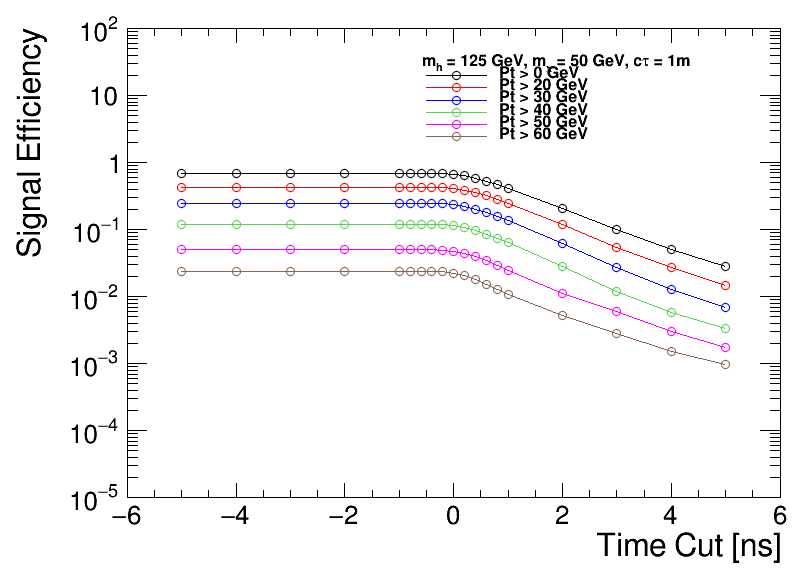

In [16]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==2:
            print(n,j,i)
            h1s[i].Draw('ALPsame')
        elif n==2:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if n==2:
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_trgs_2line.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_trgs_2line.pdf')


# others

In [37]:
test = 180*math.atan(1)/math.pi
print(test,' deg')
test1 = math.tan(math.atan(1))
print(test1, 'tan value')
theta = 2*math.atan(math.exp(-1.479))
z = 1.29/math.tan(theta)
print(theta,z)

45.0  deg
0.9999999999999999 tan value
0.4480802598611997 2.683644721727066


In [38]:
theta = 2*math.atan(math.exp(-1.78377))
z = 1.29/math.tan(theta)
print(theta,z)

0.33289834738058155 3.7308416319407427


bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9949b0fba8>
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9949b0fb38>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9948cacf28>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh125_mx50_pl10000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bbbb_ggh_mh2000_mx975_pl1000 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/LLPGenVtx_z_0.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/LLPGenVtx_z_0.pdf has been created


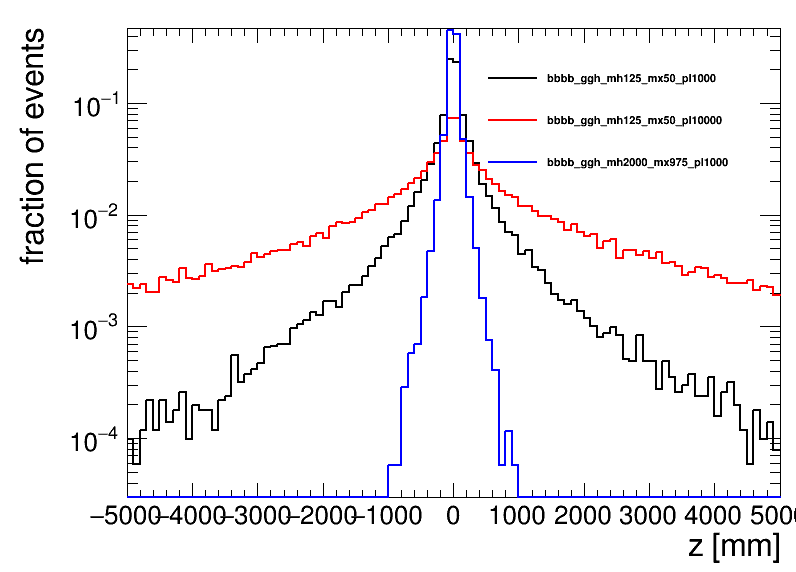

In [36]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    LLP_Vtx_z = v['gLLP_decay_vertex_z'].array()
#     weight = v['genWeight'].array()
    z= LLP_Vtx_z[:,0]
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    hz[k] = create_TH1D( z, axis_title=['z [mm]', 'fraction of events'], name=k, binning=[100,-5000,5000])
    hz[k].SetLineColor(std_color_list[i])
    hz[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(hz[k],k)

#     if i==0:
    hz[k].DrawNormalized('same')
    hz[k].GetYaxis().SetRangeUser(1e-5, 1e50)
#     hz[k].SetMaximum(1.2*hz[k].GetMaximum())
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_z_0.png')
c.SaveAs(out_dir+'LLPGenVtx_z_0.pdf')

bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9949b0fba8>
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9949b0fb38>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9948cacf28>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/LLPGenVtx_z_1.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/LLPGenVtx_z_1.pdf has been created


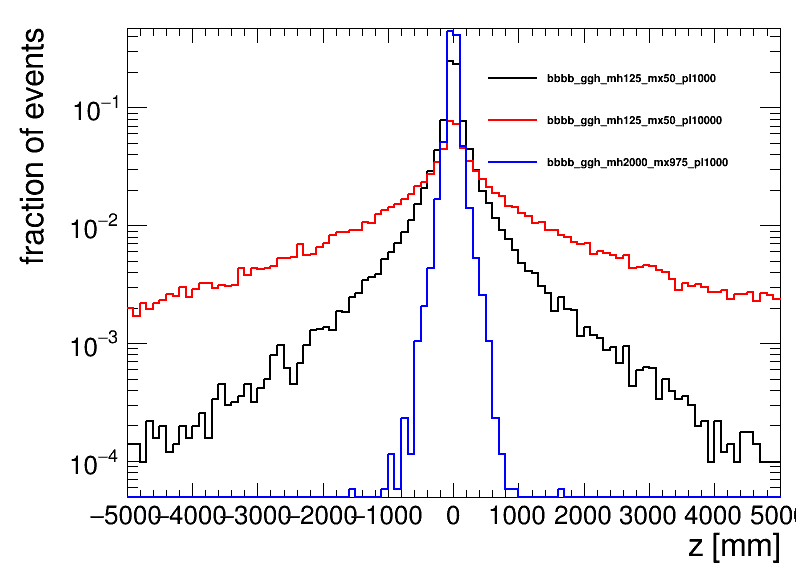

In [37]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    LLP_Vtx_z = v['gLLP_decay_vertex_z'].array()
#     weight = v['genWeight'].array()
    z= LLP_Vtx_z[:,1]
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    hz[k] = create_TH1D( z, axis_title=['z [mm]', 'fraction of events'], name=k, binning=[100,-5000,5000])
    hz[k].SetLineColor(std_color_list[i])
    hz[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(hz[k],k)

#     if i==0:
    hz[k].DrawNormalized('same')
    hz[k].GetYaxis().SetRangeUser(1e-5, 1e50)
#     hz[k].SetMaximum(1.2*hz[k].GetMaximum())
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_z_1.png')
c.SaveAs(out_dir+'LLPGenVtx_z_1.pdf')

bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9949b0fba8>
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9949b0fb38>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9948cacf28>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/LLPGenVtx_r_0.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/LLPGenVtx_r_0.pdf has been created


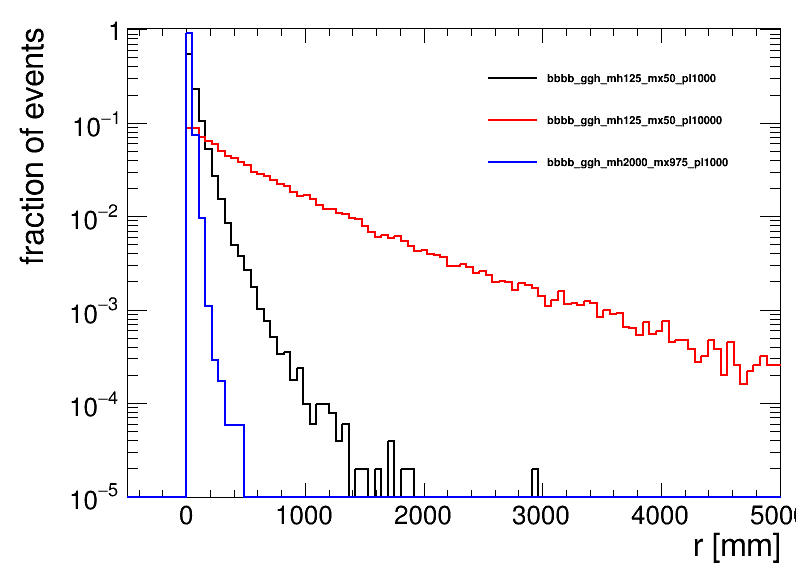

In [38]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    LLP_Vtx_x = v['gLLP_decay_vertex_x'].array()
    LLP_Vtx_y = v['gLLP_decay_vertex_y'].array()
    
    LLP_Vtx_r = []
    for evt,(x,y) in enumerate(zip(LLP_Vtx_x,LLP_Vtx_y)):
#         print(evt,x,y)
        r = math.sqrt(x[0]*x[0]+y[0]*y[0])
#         print(evt,x[0],y[0],r)
#         if evt>5:
#             break
        LLP_Vtx_r.append(r)
    LLP_Vtx_r = np.array(LLP_Vtx_r)
        
    r = LLP_Vtx_r
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    hz[k] = create_TH1D( r, axis_title=['r [mm]', 'fraction of events'], name=k, binning=[100,-500,5000])
    hz[k].SetLineColor(std_color_list[i])
    hz[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(hz[k],k)

#     if i==0:
    hz[k].DrawNormalized('same')
    hz[k].GetYaxis().SetRangeUser(1e-5, 1e50)
#     hz[k].SetMaximum(1.2*hz[k].GetMaximum())
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_r_0.png')
c.SaveAs(out_dir+'LLPGenVtx_r_0.pdf')

bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9949b0fba8>
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9949b0fb38>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9948cacf28>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/LLPGenVtx_r_1.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/LLPGenVtx_r_1.pdf has been created


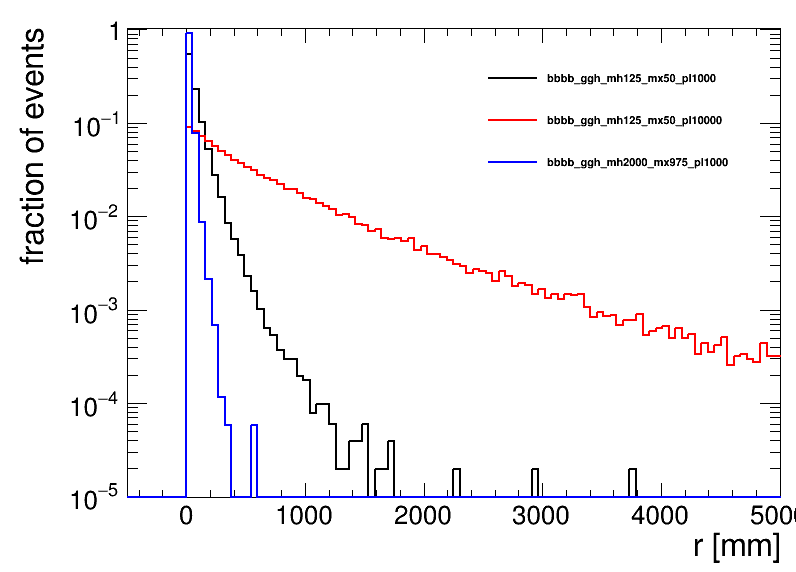

In [39]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    LLP_Vtx_x = v['gLLP_decay_vertex_x'].array()
    LLP_Vtx_y = v['gLLP_decay_vertex_y'].array()
    
    LLP_Vtx_r = []
    for evt,(x,y) in enumerate(zip(LLP_Vtx_x,LLP_Vtx_y)):
#         print(evt,x,y)
        r = math.sqrt(x[1]*x[1]+y[1]*y[1])
#         print(evt,x[0],y[0],r)
#         if evt>5:
#             break
        LLP_Vtx_r.append(r)
    LLP_Vtx_r = np.array(LLP_Vtx_r)
        
    r = LLP_Vtx_r
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    hz[k] = create_TH1D( r, axis_title=['r [mm]', 'fraction of events'], name=k, binning=[100,-500,5000])
    hz[k].SetLineColor(std_color_list[i])
    hz[k].SetMarkerColor(std_color_list[i])


    leg.AddEntry(hz[k],k)

#     if i==0:
    hz[k].DrawNormalized('same')
    hz[k].GetYaxis().SetRangeUser(1e-5, 1e50)
#     hz[k].SetMaximum(1.2*hz[k].GetMaximum())
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_r_1.png')
c.SaveAs(out_dir+'LLPGenVtx_r_1.pdf')

bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9949b0fba8>
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9949b0fb38>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9948cacf28>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/LLPGenVtx_2d_0.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/LLPGenVtx_2d_0.pdf has been created


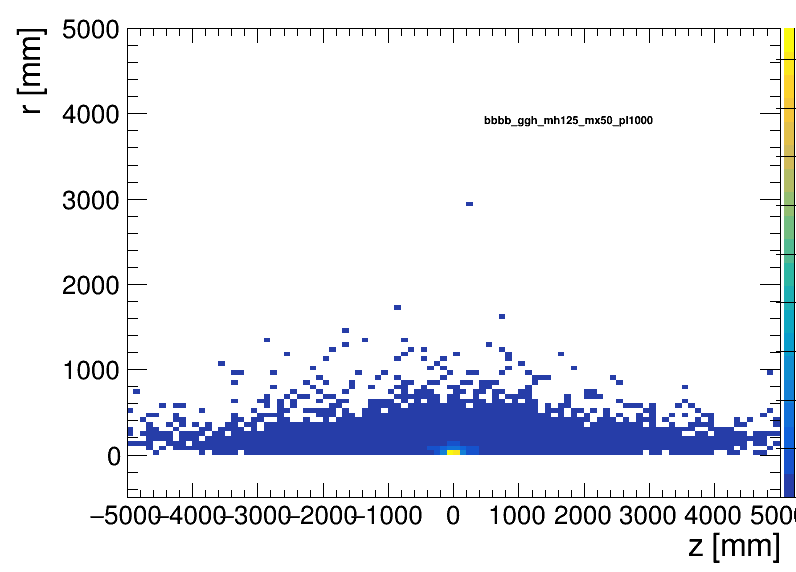

In [40]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    
    hz[k] = rt.TH2D(k,k,100,-5000,5000,100,-500,5000)
    hz[k].GetXaxis().SetTitle('z [mm]')
    hz[k].GetYaxis().SetTitle('r [mm]')
#     hz[k].SetMarkerColor(std_color_list[i])

    
    LLP_Vtx_x = v['gLLP_decay_vertex_x'].array()
    LLP_Vtx_y = v['gLLP_decay_vertex_y'].array()
    LLP_Vtx_z = v['gLLP_decay_vertex_z'].array()
  
    
    LLP_Vtx_r = []
    for evt,(x,y) in enumerate(zip(LLP_Vtx_x,LLP_Vtx_y)):
#         print(evt,x,y)
        r = math.sqrt(x[0]*x[0]+y[0]*y[0])
#         print(evt,x[0],y[0],r)
#         if evt>5:
#             break
        LLP_Vtx_r.append(r)
    LLP_Vtx_r = np.array(LLP_Vtx_r)
        

    for evt,(r,z) in enumerate(zip(LLP_Vtx_r,LLP_Vtx_z)):
        hz[k].Fill(z[0],r)
#         print(evt,x,y)
#         print(evt,r,z[0])
#         if evt>5:
#             break  
            
    


    if i==0:
        leg.SetHeader(k)
        hz[k].Draw('colz')
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_2d_0.png')
c.SaveAs(out_dir+'LLPGenVtx_2d_0.pdf')

bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9949b0fba8>
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9949b0fb38>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9948cacf28>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/LLPGenVtx_2d_1.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/LLPGenVtx_2d_1.pdf has been created


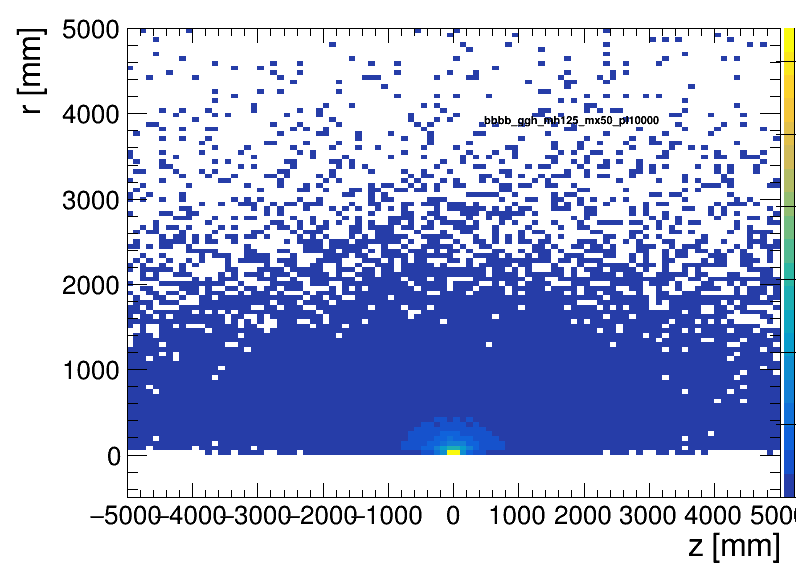

In [41]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    
    hz[k] = rt.TH2D(k,k,100,-5000,5000,100,-500,5000)
    hz[k].SetTitle(k)
    hz[k].GetXaxis().SetTitle('z [mm]')
    hz[k].GetYaxis().SetTitle('r [mm]')
#     hz[k].SetMarkerColor(std_color_list[i])

    
    LLP_Vtx_x = v['gLLP_decay_vertex_x'].array()
    LLP_Vtx_y = v['gLLP_decay_vertex_y'].array()
    LLP_Vtx_z = v['gLLP_decay_vertex_z'].array()
  
    
    LLP_Vtx_r = []
    for evt,(x,y) in enumerate(zip(LLP_Vtx_x,LLP_Vtx_y)):
#         print(evt,x,y)
        r = math.sqrt(x[0]*x[0]+y[0]*y[0])
#         print(evt,x[0],y[0],r)
#         if evt>5:
#             break
        LLP_Vtx_r.append(r)
    LLP_Vtx_r = np.array(LLP_Vtx_r)
        

    for evt,(r,z) in enumerate(zip(LLP_Vtx_r,LLP_Vtx_z)):
        hz[k].Fill(z[0],r)
#         print(evt,x,y)
#         print(evt,r,z[0])
#         if evt>5:
#             break  
            
    


    if i==1:
        leg.SetHeader(k)
        hz[k].Draw('colz')
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_2d_1.png')
c.SaveAs(out_dir+'LLPGenVtx_2d_1.pdf')

bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7fe0123e8eb8>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7fe0120fc198>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7fe011fa5198>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190531/LLPGenVtx_2d_2.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190531/LLPGenVtx_2d_2.pdf has been created


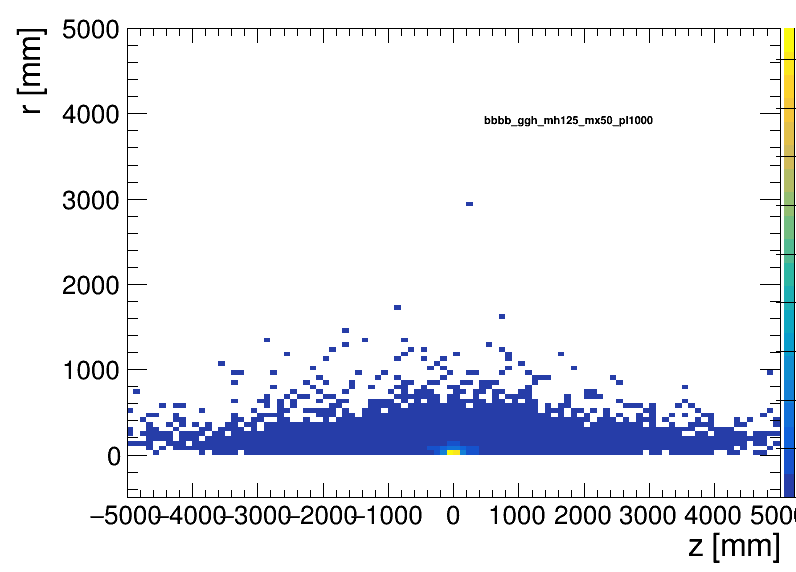

In [43]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.6,0.68,0.95,0.90);
leg.SetTextSize(0.02)
rt.gStyle.SetOptStat(0000)
i = 0

hz ={}
for k,v in tree.items():   
    print(k, v)
    
    hz[k] = rt.TH2D(k,k,100,-5000,5000,100,-500,5000)
    hz[k].SetTitle(k)
    hz[k].GetXaxis().SetTitle('z [mm]')
    hz[k].GetYaxis().SetTitle('r [mm]')
#     hz[k].SetMarkerColor(std_color_list[i])

    
    LLP_Vtx_x = v['gLLP_decay_vertex_x'].array()
    LLP_Vtx_y = v['gLLP_decay_vertex_y'].array()
    LLP_Vtx_z = v['gLLP_decay_vertex_z'].array()
  
    
    LLP_Vtx_r = []
    for evt,(x,y) in enumerate(zip(LLP_Vtx_x,LLP_Vtx_y)):
#         print(evt,x,y)
        r = math.sqrt(x[0]*x[0]+y[0]*y[0])
#         print(evt,x[0],y[0],r)
#         if evt>5:
#             break
        LLP_Vtx_r.append(r)
    LLP_Vtx_r = np.array(LLP_Vtx_r)
        

    for evt,(r,z) in enumerate(zip(LLP_Vtx_r,LLP_Vtx_z)):
        hz[k].Fill(z[0],r)
#         print(evt,x,y)
#         print(evt,r,z[0])
#         if evt>5:
#             break  
            
    


    if i==2:
        leg.SetHeader(k)
        hz[k].Draw('colz')
    
    i += 1

leg.SetBorderSize(0)
leg.SetFillStyle(0)

leg.Draw()
# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLPGenVtx_2d_2.png')
c.SaveAs(out_dir+'LLPGenVtx_2d_2.pdf')

In [5]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
sigma = [0.2,0.4,0.6,0.8,1.]
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0

Firsts_eb = []
Seconds_eb = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   

#         print(i, k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()

    jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
#     print(jetGenTime[0],BSTime[0], jetTime[0])

    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    for j,sig in enumerate(sigma):
#     for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
#         print('n',n)
        print(i, j, n,len(weight))
        SmearTime = np.random.normal(0,sig,len(BSTime))
        jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
#         print(jetTime[0],SmearTime[0], jetNewTime[0])    

    
        jetTime_most_delayed = []
        jetTime_second_delayed = []

        for evt, (time, pt) in enumerate(zip(jetNewTime,jetPt)):
    #         print(i,time,pt,len(time),len(pt))
            time_s =[]
            pt_s= []
            for par in range(len(time)):
    #             print(j,pt[j])
                time_s.append(time[par])
                pt_s.append(pt[par])
    #         print(i,time_s)
    #         print(i,pt_s)
            validpairlist = sort_valid_lists(time_s,pt_s)
    #         print(i,validpairlist)
    #         print(validpairlist[-1][0])
            if len(validpairlist)>1 :
    #             print(i,len(validpairlist))
    #             print(i,validpairlist[-1][0],validpairlist[-2][0])
                jetTime_most_delayed.append(validpairlist[-1][0])
                jetTime_second_delayed.append(validpairlist[-2][0])
            else:
                jetTime_most_delayed.append(-666)
                jetTime_second_delayed.append(-666)
#             if i>2:
#                 break
        jetTime_most_delayed = np.array(jetTime_most_delayed)
        jetTime_second_delayed = np.array(jetTime_second_delayed)
#         print(i, j, n,len(jetTime_most_delayed),len(jetTime_second_delayed))
    
        Firsts_eb.append(jetTime_most_delayed)
        Seconds_eb.append(jetTime_second_delayed)
#         print(n,'found max jet gen time')

    i += 1
    
Firsts_eb = np.array(Firsts_eb)
Seconds_eb = np.array(Seconds_eb)
print('found max, second jet gen time')
print(len(Firsts_eb),len(Seconds_eb))


19
5
3
0 0 0 50973


NameError: name 'sort_valid_lists' is not defined

In [348]:
i = 0
Power_1j_eb = []
Power_2j_eb = []

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,sig in enumerate(sigma):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+j
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts[n] 
        jetGenTime_second = Seconds[n] 
        print(len(weight),len(Firsts[n]),len(Seconds[n]))
        
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)
    #         print(tcut_string)
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
            Ntotal_1j_w = np.sum(weight1_cut666)
            Ntotal_2j_w = np.sum(weight_cut666)
    #         print('1j total',Ntotal_1j_w)
    #         print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]
    #         Nsel_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.sum(tcutted_w1_v)
            Nsel_2j_w = np.sum(tcutted_w_v)
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_eb.append(Power_eff_1j)
        Power_2j_eb.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_eb = np.array(Power_1j_eb)
Power_2j_eb = np.array(Power_2j_eb)
print(Power_1j_eb)
print(Power_2j_eb)


bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9b8aa47d30>
26133 26133 26133
26133 26133 26133
26133 26133 26133
26133 26133 26133
26133 26133 26133
bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f9ab7ef94a8>
82611 82611 82611
82611 82611 82611
82611 82611 82611
82611 82611 82611
82611 82611 82611
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f9b884863c8>
74588 74588 74588
74588 74588 74588
74588 74588 74588
74588 74588 74588
74588 74588 74588
[[1.         1.         1.         1.         1.         1.
  1.         0.99992284 0.99841758 0.99336134 0.98035432 0.95916474
  0.92979273 0.89466978 0.85557138 0.65000577 0.45489982 0.30360108
  0.19757611]
 [1.         1.         1.         1.         0.99996142 0.99972981
  0.99899642 0.99695091 0.99228071 0.98328766 0.96819638 0.94743137
  0.92052955 0.8863329  0.85229069 0.65039176 0.45486124 0.30773088
  0.20070243]
 [1.         1.         1.         1.         0.99899642 0.99722098
  0.99451924 0.98946311 0.98182099 0.97105

In [239]:
import numpy as np

print('Does Olmo suck?')
if np.random.uniform() > 0.5:
    print ('Yes')
else: print ('No')

Does Olmo suck?
Yes


In [54]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

h1s = {}
h2s = {}

t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)
# print(len(t_cuts))
sigma = [0.2,0.4,0.6,0.8,1.]

for k,v in tree.items():   
    print(i, k, v)

    for  j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(tree)+j
        print(n)
    
        Power_eff_1j = Power_1j[n] 

        power1 = np.array(Power_eff_1j) 
        print(num, t_cuts, power)
#         h1s[n] = rt.TGraph(num , t_cuts, power1)

#         Power_eff_2j = Power_2j[n] 

#         power2 = np.array(Power_eff_2j) 
#         h2s[n] = rt.TGraph(num , t_cuts, power2)

#         h1s[n].SetLineColor(std_color_list[j])
#         h1s[n].SetMarkerColor(std_color_list[j])
#         h1s[n].SetMarkerStyle(22+i)
#         #     hrej[m].SetMarkerSize(2)

#         h2s[n].SetLineStyle(7)
#         h2s[n].SetLineColor(std_color_list[j])
#         h2s[n].SetMarkerColor(std_color_list[j])
#         h2s[n].SetMarkerStyle(22+i)


#         leg.SetBorderSize(0)
#         leg.AddEntry(h1s[k],k+' One jet')
#         leg.AddEntry(h2s[k],k+' Two jets')

#         h1s[n].SetTitle( 'Signal Efficiency' )
#         h1s[n].GetXaxis().SetTitle( 'Time Cut [ns]' )
#         #hrej[m].GetXaxis().SetRangeUser(-10,10)
#         h1s[n].GetYaxis().SetRangeUser(1e-2,1e1)
#         h1s[n].GetYaxis().SetTitle( 'Signal Efficiency' )
#         if i==0 and j==0:
#             h1s[n].Draw('ALPsame')
#         elif i==0 and j>0:
#             h1s[k].Draw('LPsame')
#             h2s[k].Draw('LPsame')
    
    i += 1


leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear.pdf')


19
0 bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9b8a887080>
0
19 [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0] [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.1398329  0.060724   0.02841592
 0.0147459 ]
1
19 [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0] [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.1398329  0.060724   0.02841592
 0.0147459 ]
2
19 [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0] [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.13

IndexError: index 3 is out of bounds for axis 0 with size 3

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [54]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

h1s = {}
h2s = {}

t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)
# print(len(t_cuts))
sigma = [0.2,0.4,0.6,0.8,1.]

for k,v in tree.items():   
    print(i, k, v)

    for  j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(tree)+j
        print(n)
    
        Power_eff_1j = Power_1j[n] 

        power1 = np.array(Power_eff_1j) 
        print(num, t_cuts, power)
#         h1s[n] = rt.TGraph(num , t_cuts, power1)

#         Power_eff_2j = Power_2j[n] 

#         power2 = np.array(Power_eff_2j) 
#         h2s[n] = rt.TGraph(num , t_cuts, power2)

#         h1s[n].SetLineColor(std_color_list[j])
#         h1s[n].SetMarkerColor(std_color_list[j])
#         h1s[n].SetMarkerStyle(22+i)
#         #     hrej[m].SetMarkerSize(2)

#         h2s[n].SetLineStyle(7)
#         h2s[n].SetLineColor(std_color_list[j])
#         h2s[n].SetMarkerColor(std_color_list[j])
#         h2s[n].SetMarkerStyle(22+i)


#         leg.SetBorderSize(0)
#         leg.AddEntry(h1s[k],k+' One jet')
#         leg.AddEntry(h2s[k],k+' Two jets')

#         h1s[n].SetTitle( 'Signal Efficiency' )
#         h1s[n].GetXaxis().SetTitle( 'Time Cut [ns]' )
#         #hrej[m].GetXaxis().SetRangeUser(-10,10)
#         h1s[n].GetYaxis().SetRangeUser(1e-2,1e1)
#         h1s[n].GetYaxis().SetTitle( 'Signal Efficiency' )
#         if i==0 and j==0:
#             h1s[n].Draw('ALPsame')
#         elif i==0 and j>0:
#             h1s[k].Draw('LPsame')
#             h2s[k].Draw('LPsame')
    
    i += 1


leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear.pdf')


19
0 bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f9b8a887080>
0
19 [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0] [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.1398329  0.060724   0.02841592
 0.0147459 ]
1
19 [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0] [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.1398329  0.060724   0.02841592
 0.0147459 ]
2
19 [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0] [1.         1.         1.         1.         1.         0.99996837
 0.99981016 0.99740522 0.98395668 0.93253592 0.82621357 0.68929184
 0.56312891 0.45557242 0.36928044 0.13

IndexError: index 3 is out of bounds for axis 0 with size 3

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [85]:
i = 0
Power_rej = []
Power_eff = []
for k,v in tree.items():   
    print(k, v)
    jetGenTime = v['gen_time'].array()
    beamGenTime = v['genVertexT'].array()
    weight = v['genWeight'].array()
    
    Ntotal_w = np.sum(weight)
    print(Ntotal_w)

    Power_rej_i = []
    Power_eff_i = []

    jetGenTime_max = maxes[i] 

    for p, q in enumerate(t_cuts):
#         print(p,q)
        tcut_string = np.logical_and( beamGenTime > q, jetGenTime_max > -666)
        tcutted_t_v = beamGenTime[tcut_string]
        tcutted_w_v = weight[tcut_string]
    #     Ntotal_w = tcutted_w_v.shape[0]
        Nsel_w = np.sum(tcutted_w_v)
#         print(Nsel_w)
        Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
        Prej_i = 1.0*Ntotal_w/Nsel_w
        Power_rej_i.append(Prej_i)
        Peff_i = 1.0*Nsel_w/Ntotal_w
        Power_eff_i.append(Peff_i)
        
    Power_rej_i = np.array(Power_rej_i) 
    print('Rejection power',Power_rej_i)
    Power_rej.append(Power_rej_i)
    
    Power_eff_i = np.array(Power_eff_i) 
    print('Signal Efficiency',Power_eff_i)
    Power_eff.append(Power_eff_i)
    
    i += 1
    
Power_rej = np.array(Power_rej)        
Power_eff = np.array(Power_eff)


bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4e426430f0>
0.07728062
Rejection power [6.60254237e+00 6.60254237e+00 6.60254237e+00 6.60254237e+00
 6.60254237e+00 6.60254237e+00 6.60254237e+00 6.60465392e+00
 6.67887503e+00 7.58455789e+00 1.32495613e+01 5.23185673e+01
 5.43493496e+02 7.51009201e+03 8.26110153e+04            inf
            inf            inf            inf            inf]
Signal Efficiency [1.51456809e-01 1.51456809e-01 1.51456809e-01 1.51456809e-01
 1.51456809e-01 1.51456809e-01 1.51456809e-01 1.51408388e-01
 1.49725814e-01 1.31846841e-01 7.54741970e-02 1.91136733e-02
 1.83994842e-03 1.33154161e-04 1.21049233e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4e423b8f60>
8.252585
Rejection power [1.00864559e+00 1.00864559e+00 1.00864559e+00 1.00864559e+00
 1.00864559e+00 1.00864559e+00 1.00864559e+00 1.00899606e+00
 1.02034196e+00 1.15801828e+00 2.03132529e+00 7.96737904e+00
 8.653

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


bbbb_vh_ISR_mh125_mx50_pl10000 <TTree b'llp' at 0x7f4e426430f0>
bbbb_vh_ISR_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f4e423b8f60>
bbbb_vh_ISR_mh125_mx50_pl1000 <TTree b'llp' at 0x7f4e423d6320>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190531/SignalEff_GenTimeMax_TimeCutOnBeamSpot.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190531/SignalEff_GenTimeMax_TimeCutOnBeamSpot.pdf has been created


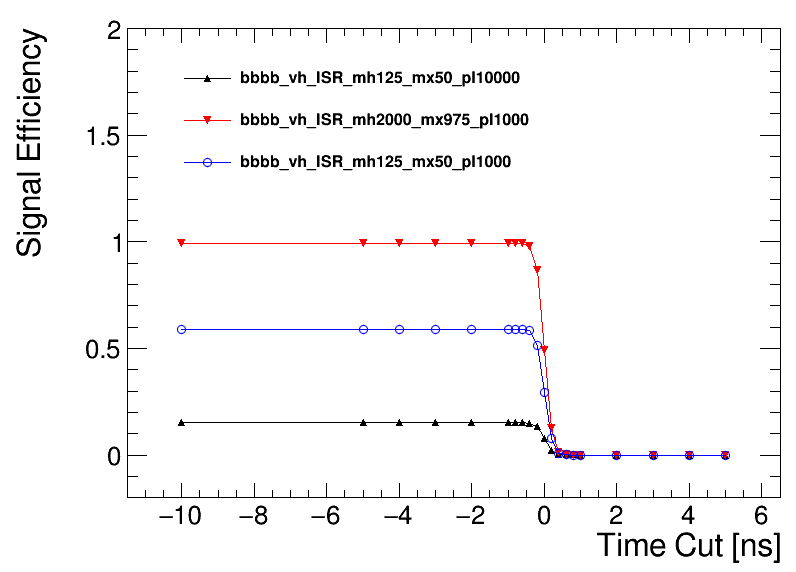

In [86]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

heff = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)

for k,v in tree.items():   
    print(k, v)

    Power_eff_i = Power_eff[i] 
    
    power = np.array(Power_eff_i) 
    #print num, t_cuts, power
    heff[k] = rt.TGraph(num , t_cuts, power)

    heff[k].SetLineColor(std_color_list[i])
    heff[k].SetMarkerColor(std_color_list[i])
    heff[k].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(heff[k],k)

    heff[k].SetTitle( 'Signal Efficiency' )
    heff[k].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    heff[k].GetYaxis().SetRangeUser(-0.2,2)
    heff[k].GetYaxis().SetTitle( 'Signal Efficiency' )
    if i==0 :
        heff[k].Draw('ALPsame')
    else:
        heff[k].Draw('LPsame')
    
    i += 1


leg.Draw()
# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTimeMax_TimeCutOnBeamSpot.png')
c.SaveAs(out_dir+'SignalEff_GenTimeMax_TimeCutOnBeamSpot.pdf')


In [4]:
theta = 2*math.atan(math.exp(-1.7837746))
z = -0.538/math.tan(theta)
print(theta,z)


0.33289684417918397 -1.5559709825134156


# TOTAL NUM = INSIDE ECAL

In [17]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
sigma = [0.2,0.4,0.6,0.8,1.]
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0

Firsts_Ecal = []
Seconds_Ecal = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   

#         print(i, k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()

    jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
#     print(jetGenTime[0],BSTime[0], jetTime[0])

    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    for j,sig in enumerate(sigma):
#     for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
#         print('n',n)
        print(i, j, n,len(weight))
        SmearTime = np.random.normal(0,sig,len(BSTime))
        jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
#         print(jetTime[0],SmearTime[0], jetNewTime[0])    

    
        jetTime_most_delayed = []
        jetTime_second_delayed = []

        for evt, (time, pt) in enumerate(zip(jetNewTime,jetPt)):
    #         print(i,time,pt,len(time),len(pt))
            time_s =[]
            pt_s= []
            for par in range(len(time)):
    #             print(j,pt[j])
                time_s.append(time[par])
                pt_s.append(pt[par])
    #         print(i,time_s)
    #         print(i,pt_s)
            validpairlist = sort_valid_lists(time_s,pt_s)
    #         print(i,validpairlist)
    #         print(validpairlist[-1][0])
            if len(validpairlist)>1 :
    #             print(i,len(validpairlist))
    #             print(i,validpairlist[-1][0],validpairlist[-2][0])
                jetTime_most_delayed.append(validpairlist[-1][0])
                jetTime_second_delayed.append(validpairlist[-2][0])
            else:
                jetTime_most_delayed.append(-666)
                jetTime_second_delayed.append(-666)
#             if i>2:
#                 break
        jetTime_most_delayed = np.array(jetTime_most_delayed)
        jetTime_second_delayed = np.array(jetTime_second_delayed)
#         print(i, j, n,len(jetTime_most_delayed),len(jetTime_second_delayed))
    
        Firsts_Ecal.append(jetTime_most_delayed)
        Seconds_Ecal.append(jetTime_second_delayed)
#         print(n,'found max jet gen time')

    i += 1
    
Firsts_Ecal = np.array(Firsts_Ecal)
Seconds_Ecal = np.array(Seconds_Ecal)
print('found max, second jet gen time')
print(len(Firsts_Ecal),len(Seconds_Ecal))


19
5
3
0 0 0 50973
0 1 1 50973
0 2 2 50973
0 3 3 50973
0 4 4 50973
1 0 5 17362
1 1 6 17362
1 2 7 17362
1 3 8 17362
1 4 9 17362
2 0 10 50918
2 1 11 50918
2 2 12 50918
2 3 13 50918
2 4 14 50918
found max, second jet gen time
15 15


In [18]:
i = 0
Power_1j_Ecal = []
Power_2j_Ecal = []

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,sig in enumerate(sigma):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+j
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts_Ecal[n] 
        jetGenTime_second = Seconds_Ecal[n] 
        print(len(weight),len(Firsts_Ecal[n]),len(Seconds_Ecal[n]))
        
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)
    #         print(tcut_string)
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
#             Ntotal_1j_w = np.sum(weight1_cut666)          
#             Ntotal_2j_w = np.sum(weight_cut666)
            Ntotal_1j_w = np.shape(weight1_cut666)[0]          
            Ntotal_2j_w = np.shape(weight_cut666)[0]
#             Ntotal_1j_w = nevts[k]          
#             Ntotal_2j_w = nevts[k]
#             print('1j total',Ntotal_1j_w)
#             print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]
    #         Nsel_w = np.sum(tcutted_w_v)
#             Nsel_1j_w = np.sum(tcutted_w1_v)
#             Nsel_2j_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.shape(tcutted_w1_v)[0]
            Nsel_2j_w = np.shape(tcutted_w_v)[0]
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_Ecal.append(Power_eff_1j)
        Power_2j_Ecal.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_Ecal = np.array(Power_1j_Ecal)
Power_2j_Ecal = np.array(Power_2j_Ecal)
# print(Power_1j_Ecal)
# print(Power_2j_Ecal)


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918


In [26]:
i = 0
Power_1j_Trgs = []
Power_2j_Trgs = []

pt_cuts = [0,20,30,40,50,60]

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+0
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts_ecal[n] 
        jetGenTime_second = Seconds_ecal[n] 
        print(len(weight),len(Firsts_ecal[n]),len(Seconds_ecal[n]))
        
        jetPt_max = Pt_maxes[i] 
        jetPt_second = Pt_seconds[i] 
        print(len(weight),len(Pt_maxes[i]),len(Pt_seconds[i]))

#         for mm, nn in enumerate(pt_cuts):
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)

            ptcut_string1 = np.logical_and( jetPt_max > pt, jetPt_max>-600)
            ptcut_string2 = np.logical_and( jetPt_second > pt, jetPt_second>-600)
            ptcut_string = np.logical_and( ptcut_string1, ptcut_string2)

            cut_string = np.logical_and( ptcut_string1, tcut_string)
            cut_string1 = np.logical_and( ptcut_string1, tcut_string1)
            cut_string2 = np.logical_and( ptcut_string2, tcut_string2)
            
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
#             Ntotal_1j_w = np.sum(weight1_cut666)          
#             Ntotal_2j_w = np.sum(weight_cut666)
            Ntotal_1j_w = np.shape(weight1_cut666)[0]          
            Ntotal_2j_w = np.shape(weight_cut666)[0]

#             Ntotal_1j_w = nevts[k]          
#             Ntotal_2j_w = nevts[k]
#             print('1j total',Ntotal_1j_w)
#             print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]

            ptcutted_w_v = weight[ptcut_string]
            ptcutted_w1_v = weight[ptcut_string1]
            ptcutted_w2_v = weight[ptcut_string2]


            cutted_w_v = weight[cut_string]
            cutted_w1_v = weight[cut_string1]
            cutted_w2_v = weight[cut_string2]


    #         Nsel_w = np.sum(tcutted_w_v)
#             Nsel_1j_w = np.sum(tcutted_w1_v)
#             Nsel_2j_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.shape(cutted_w1_v)[0]
            Nsel_2j_w = np.shape(cutted_w_v)[0]
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_Trgs.append(Power_eff_1j)
        Power_2j_Trgs.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_Trgs = np.array(Power_1j_Trgs)
Power_2j_Trgs = np.array(Power_2j_Trgs)
# print(Power_1j_Trgs[2])
# print(Power_2j_Trgs)


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
2 0 12
2 1 13
2 2 14
2 3 15
2 4 16
2 5 17


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line.pdf has been created


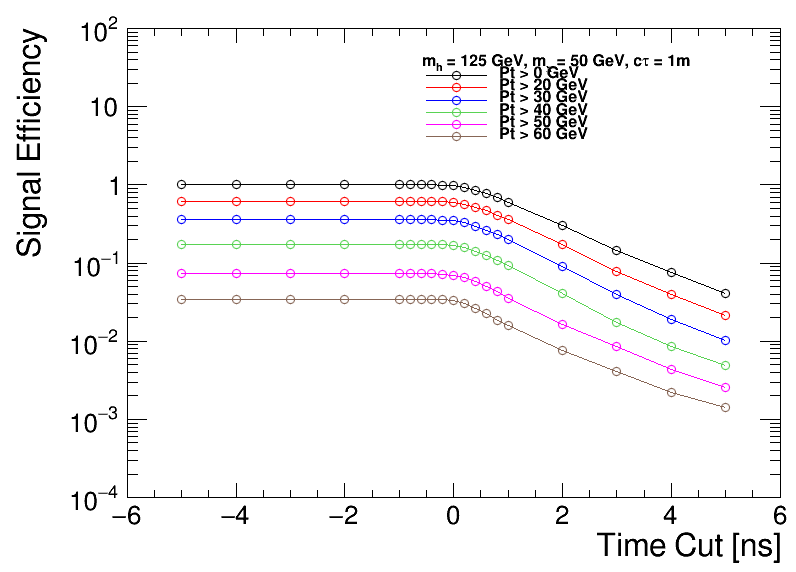

In [20]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==2:
            print(n,j,i)
            h1s[i].Draw('ALPsame')
        elif n==2:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if n==2:
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line.pdf')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
2 0 12
0.8
0 0.683405549657092
2 1 13
20 0.411489569284628
2 2 14
30 0.2315704898275417
2 3 15
40 0.1083244856380384
2 4 16
50 0.04292806106344515
2 5 17
60 0.018709288645298288


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Mass1.png has been created


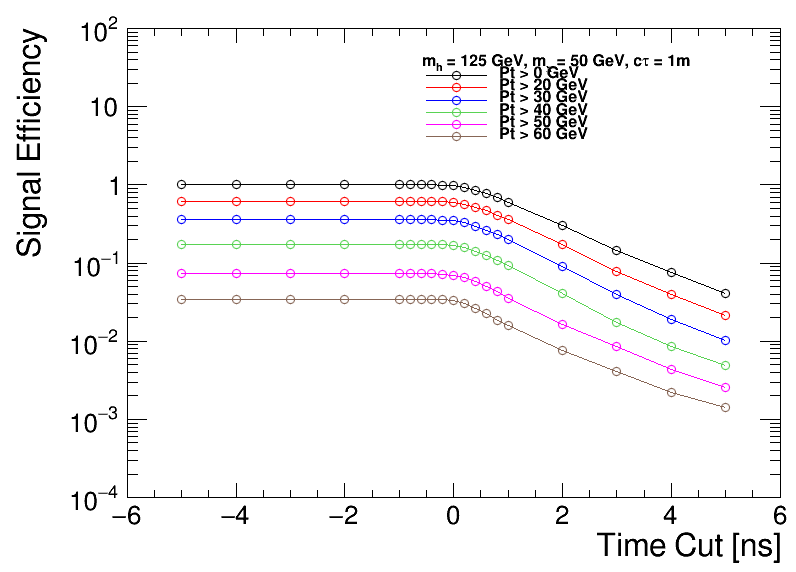

In [62]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==2:
            print(n,j,i)
            h1s[i].Draw('ALPsame')
            print(t_cuts[13])
            print(pt,power1[13])
        elif n==2:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            print(pt,power1[13])
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if n==2:
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Mass1.png')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
0 5 5
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Mass2.png has been created


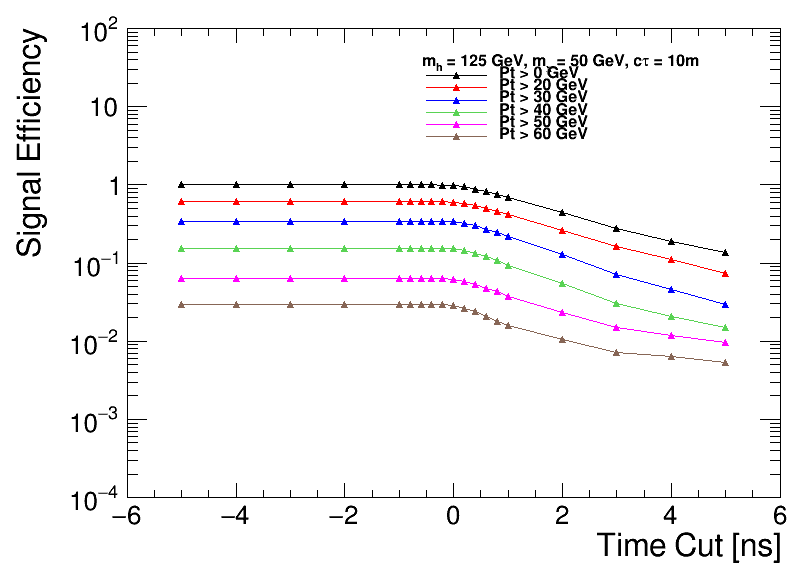

In [30]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==0:
            print(n,j,i)
            h1s[i].Draw('ALPsame')
        elif n==0:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if n==0:
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Mass2.png')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
1 0 6
1 1 7
1 2 8
1 3 9
1 4 10
1 5 11
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Mass3.png has been created


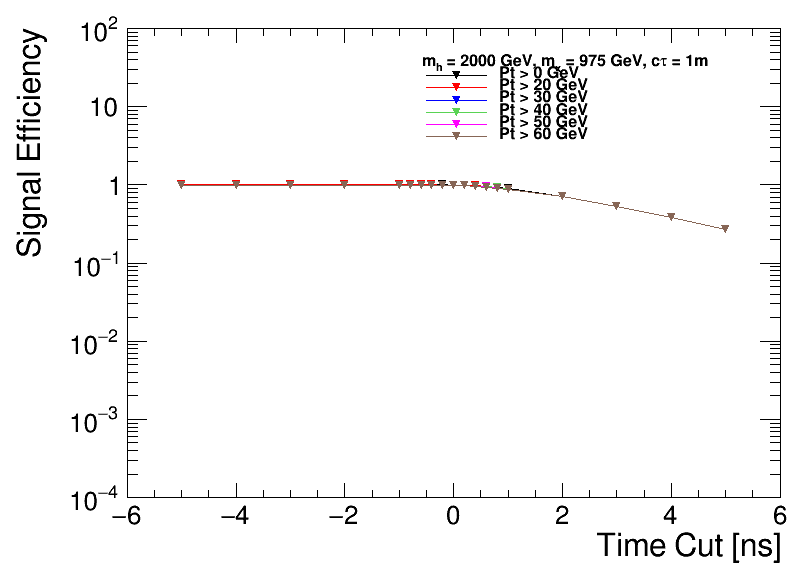

In [31]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==1:
            print(n,j,i)
            h1s[i].Draw('ALPsame')
        elif n==1:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if n==1:
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Mass3.png')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
0 1 1
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
1 1 7
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
2 1 13


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt20.png has been created


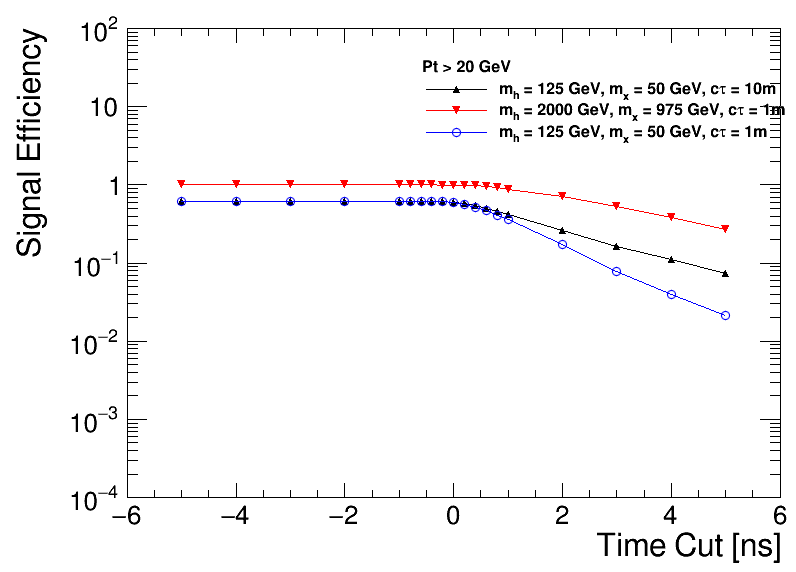

In [63]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==1 and n==0:
            print(n,j,i)
            leg1.SetHeader('Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].SetLineColor(std_color_list[n])
            h1s[i].SetMarkerColor(std_color_list[n])
            h1s[i].Draw('ALPsame')
        elif j==1:
            print(n,j,i)
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].SetLineColor(std_color_list[n])
            h1s[i].SetMarkerColor(std_color_list[n])
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
#         if n==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt20.png')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
0 0 0
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
1 0 6
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
2 0 12


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt0.png has been created


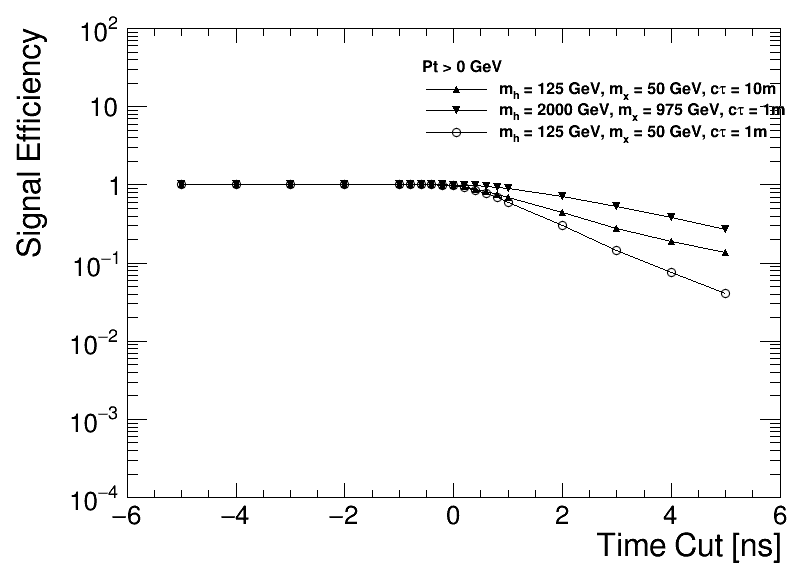

In [42]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==0:
            print(n,j,i)
            leg1.SetHeader('Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('ALPsame')
        elif j==0:
            print(n,j,i)
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
#         if n==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt0.png')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
0 2 2
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
1 2 8
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
2 2 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt30.png has been created


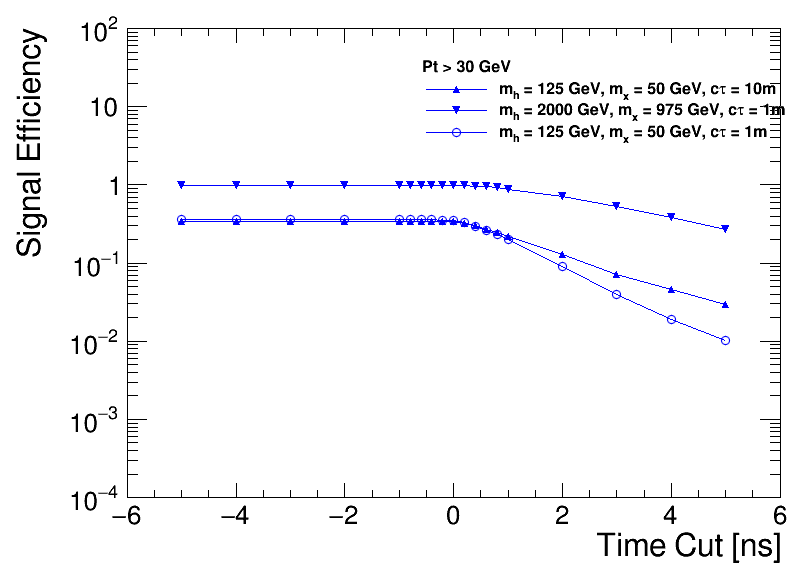

In [46]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==2 and n==0:
            print(n,j,i)
            leg1.SetHeader('Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('ALPsame')
        elif j==2:
            print(n,j,i)
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
#         if n==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt30.png')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
0 3 3
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
1 3 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
2 3 15


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt40.png has been created


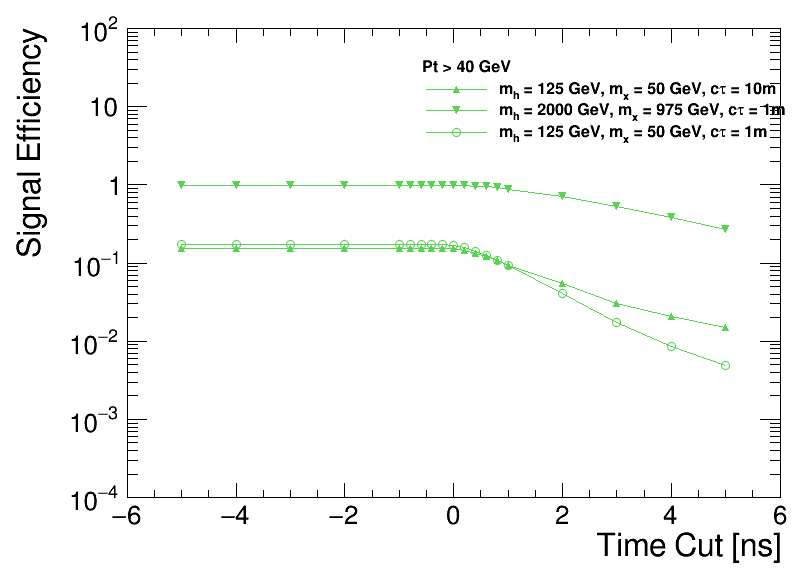

In [45]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==3 and n==0:
            print(n,j,i)
            leg1.SetHeader('Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('ALPsame')
        elif j==3:
            print(n,j,i)
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
#         if n==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt40.png')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
0 4 4
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
1 4 10
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
2 4 16


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt50.png has been created


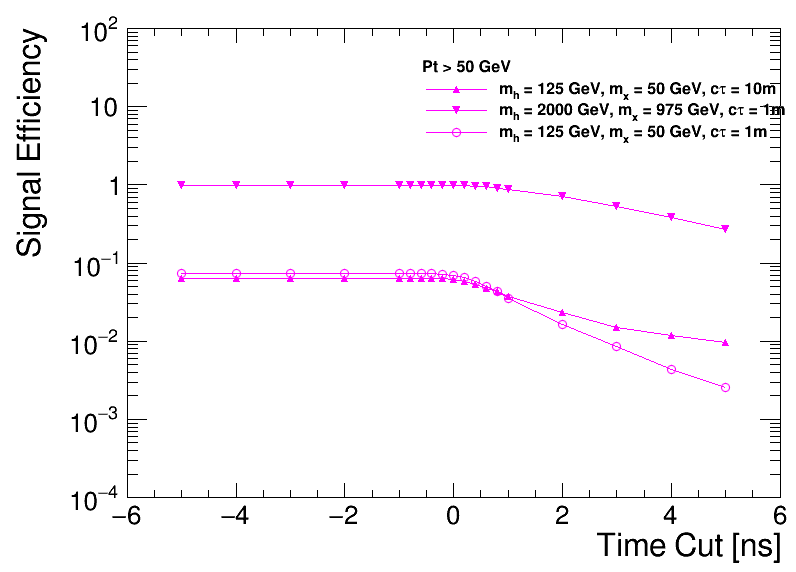

In [47]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==4 and n==0:
            print(n,j,i)
            leg1.SetHeader('Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('ALPsame')
        elif j==4:
            print(n,j,i)
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
#         if n==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt50.png')


bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f60d9155e80>
0 5 5
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f60d8722ef0>
1 5 11
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f60d85b67b8>
2 5 17


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt60.png has been created


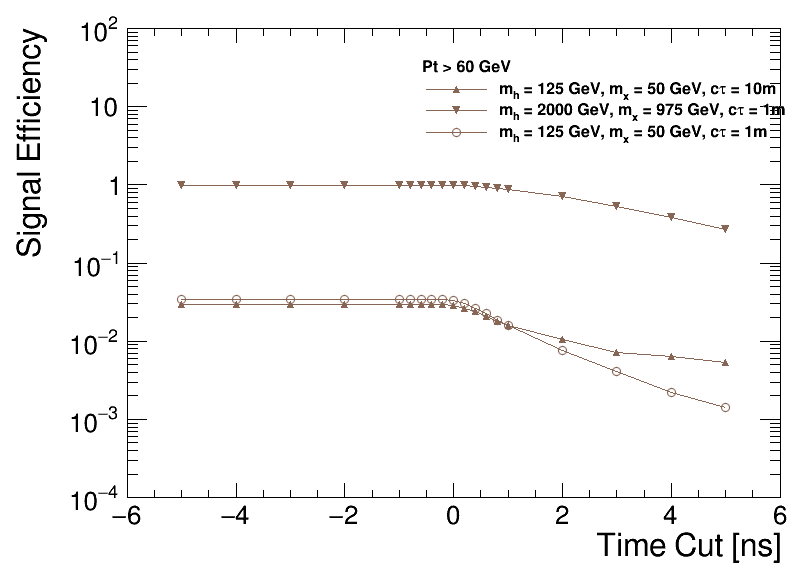

In [49]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==5 and n==0:
            print(n,j,i)
            leg1.SetHeader('Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('ALPsame')
        elif j==5:
            print(n,j,i)
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
#         if n==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt60.png')


In [214]:
import scipy.stats

In [215]:
scipy.stats.norm(0, 1)

In [216]:
scipy.stats.norm.sf(1,0,0.2)

2.866515718791933e-07

In [217]:
1/2.866515718791933e-07

3488555.787237898

# Gen level of LLP vertices

bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f0a586afef0>
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f0a57c80f98>
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f0a57b1a940>
 FCN=13.9771 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=4.7429e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.82471e+03   2.11898e+01   3.21165e-02   4.77449e-05
   2  Mean        -1.05791e+00   2.42044e-02   4.56632e-05   1.92150e-03
   3  Sigma        5.31161e+00   1.84301e-02   1.77365e-06   9.76414e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190604/LLP_Prod_Vtx_z.png has been created


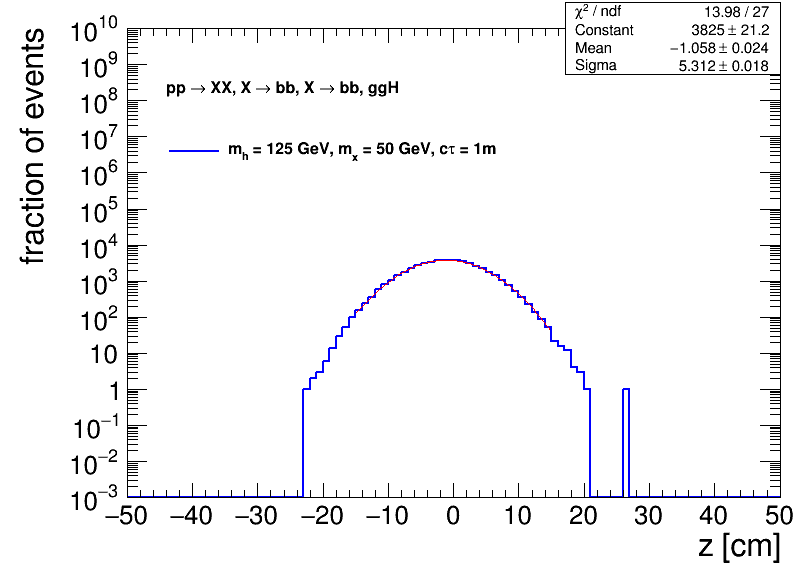

In [9]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.20,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

htm ={}
for k,v in tree.items():   
    print(k, v)
    LLP_prod_z = v['gLLP_prod_vertex_z'].array()
    z = LLP_prod_z[:,0]
#     jetGenTime = v['gen_time'].array()
#     jetmatch = v['gLLP_daughter_match_jet_index'].array()
#     weight = v['genWeight'].array()
#     t = jetGenTime[:,0]
#     vt = jetGenTime[jetmatch!=666]
#     print(jetGenTime[0],jetmatch[0],vt[0:10])
#     t = vt[:0]
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    htm[k] = create_TH1D( z, axis_title=[' z [cm]', 'fraction of events'], name=k, binning=[100,-50,50])
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    htm[k].SetLineColor(std_color_list[i+2])
    htm[k].SetMarkerColor(std_color_list[i+2])
    htm[k].GetYaxis().SetRangeUser(1e-3,1e10)

    if i==0:
        leg.AddEntry(htm[k],texs[k])

        htm[k].DrawNormalized('same')
        htm[k].Fit('gaus','','',-15,15)
    
    i += 1

leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLP_Prod_Vtx_z.png')
